<h1><font color= 'Blue'>
    <span style="font-family:Candara">Telecom Churn Group Case Study</span></font></h1> 

<h2><font color= 'Green'><span style="font-family:Candara">Problem Statement</span></font></h2>

<h3><font color= 'Green'><span style="font-family:Candara">Business problem overview</span></font></h3>

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

- For many incumbent operators, retaining high profitable customers is the number one business goal.

- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

<h3><font color= 'Green'><span style="font-family:Candara">Definitions of churn</span></font></h3>

- ***Revenue-based churn:*** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

- The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

- ***Usage-based churn:*** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

- A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

Here we are dealing with *Usage-based churn*.

<h3><font color= 'Green'><span style="font-family:Candara">High-value churn</span></font></h3>

- In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

- In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

<h3><font color= 'Green'><span style="font-family:Candara">Understanding customer behaviour during churn</span></font></h3>

- Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- The ***Good*** phase: In this phase, the customer is happy with the service and behaves as usual.

- The ***Action*** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ***Churn*** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

<h2><font color= 'Blue'><span style="font-family:Candara">1. Importing Python Libraries</span></font></h2>

In [1]:
# importing warnings to supress them 

import warnings 
warnings.filterwarnings('ignore')

# importing pandas and numpy for data analysis 
import numpy as np 
import pandas as pd

# importing visualizartion libraries 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# scipy packages
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# importing machine-learning models required for model building 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report,roc_curve, auc

In [2]:
# setting up views 

# displaying max columns
pd.options.display.max_columns= None 

# displaying max rows 
pd.options.display.max_rows= None

<h2><font color= 'Blue'><span style="font-family:Candara">2. Read & Understanding Telecom Data</span></font></h2> 

In [3]:
# reading the data into dataframe 

telecom= pd.read_csv('telecom_churn_data.csv')

# checking the head values 
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# inspecting the basics of dataframe 

print('Shape of the telecom data: '+str(telecom.shape))
print('Number of Customers: '+str(len(telecom)))
print('Number of Independent Features: '+str(len(telecom.columns)-1))

Shape of the telecom data: (99999, 226)
Number of Customers: 99999
Number of Independent Features: 225


In [5]:
# checking the info of the columns 

telecom.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# describing the numerical statistics 

telecom.iloc[:,1:].describe()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    99999.0         98981.0         98981.0         98981.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_

<h2><font color= 'Blue'><span style="font-family:Candara">3. Data Cleaning</span></font></h2> 

<h3><font color= 'Blue'><span style="font-family:Candara">Handling Missing Values</span></font></h3> 

In [7]:
# defining a function to return the null values 

def null_val_cal(df): 
    null_df= pd.DataFrame()
    null_df['Columns']= df.columns
    null_df['Null Values']= [df[col].isnull().sum() for col in df.columns]
    null_df['Null %']= [round((df[col].isnull().sum()/len(df))* 100, 2) for col in df.columns]
    null_df.sort_values(by= 'Null %', ascending= False, inplace= True)
    null_df= null_df[null_df['Null %'] > 0]
    return null_df

In [8]:
# checking the null values in telecom dataframe 

telecom_null= null_val_cal(telecom)
telecom_null

Columns  Null Values  Null %
189                 arpu_3g_6        74846   74.85
197          night_pck_user_6        74846   74.85
161         total_rech_data_6        74846   74.85
193                 arpu_2g_6        74846   74.85
165           max_rech_data_6        74846   74.85
217                 fb_user_6        74846   74.85
177        av_rech_amt_data_6        74846   74.85
157  date_of_last_rech_data_6        74846   74.85
169           count_rech_2g_6        74846   74.85
173           count_rech_3g_6        74846   74.85
158  date_of_last_rech_data_7        74428   74.43
162         total_rech_data_7        74428   74.43
218                 fb_user_7        74428   74.43
166           max_rech_data_7        74428   74.43
198          night_pck_user_7        74428   74.43
170           count_rech_2g_7        74428   74.43
178        av_rech_amt_data_7        74428   74.43
194                 arpu_2g_7        74428   74.43
174           count_rech_3g_7        74428   74.43
190                 arpu_3g_7        74428   74.43
164         total_rech_data_9        74077   74.08
176           count_rech_3g_9        74077   74.08
220                 fb_user_9        74077   74.08
168           max_rech_data_9        74077   74.08
192                 arpu_3g_9        74077   74.08
160  date_of_last_rech_data_9        74077   74.08
200          night_pck_user_9        74077   74.08
196                 arpu_2g_9        74077   74.08
172           count_rech_2g_9        74077   74.08
180        av_rech_amt_data_9        74077   74.08
163         total_rech_data_8        73660   73.66
191                 arpu_3g_8        73660   73.66
219                 fb_user_8        73660   73.66
199          night_pck_user_8        73660   73.66
179        av_rech_amt_data_8        73660   73.66
167           max_rech_data_8        73660   73.66
175           count_rech_3g_8        73660   73.66
195                 arpu_2g_8        73660   73.66
171           count_rech_2g_8        73660   73.66
159  date_of_last_rech_data_8        73660   73.66
136               ic_others_9         7745    7.75
68               std_og_mou_9         7745    7.75
64           std_og_t2c_mou_9         7745    7.75
132              isd_ic_mou_9         7745    7.75
120              std_ic_mou_9         7745    7.75
72               isd_og_mou_9         7745    7.75
76               spl_og_mou_9         7745    7.75
128              spl_ic_mou_9         7745    7.75
80                og_others_9         7745    7.75
88           loc_ic_t2t_mou_9         7745    7.75
116          std_ic_t2o_mou_9         7745    7.75
92           loc_ic_t2m_mou_9         7745    7.75
112          std_ic_t2f_mou_9         7745    7.75
96           loc_ic_t2f_mou_9         7745    7.75
100              loc_ic_mou_9         7745    7.75
108          std_ic_t2m_mou_9         7745    7.75
60           std_og_t2f_mou_9         7745    7.75
52           std_og_t2t_mou_9         7745    7.75
104          std_ic_t2t_mou_9         7745    7.75
48               loc_og_mou_9         7745    7.75
28              roam_og_mou_9         7745    7.75
36           loc_og_t2m_mou_9         7745    7.75
40           loc_og_t2f_mou_9         7745    7.75
24              roam_ic_mou_9         7745    7.75
20               offnet_mou_9         7745    7.75
44           loc_og_t2c_mou_9         7745    7.75
32           loc_og_t2t_mou_9         7745    7.75
56           std_og_t2m_mou_9         7745    7.75
16                onnet_mou_9         7745    7.75
15                onnet_mou_8         5378    5.38
103          std_ic_t2t_mou_8         5378    5.38
119              std_ic_mou_8         5378    5.38
87           loc_ic_t2t_mou_8         5378    5.38
27              roam_og_mou_8         5378    5.38
107          std_ic_t2m_mou_8         5378    5.38
99               loc_ic_mou_8         5378    5.38
111          std_ic_t2f_mou_8         5378    5.38
23              roam_ic_mou_8         5378  

<h3><font color= 'Green'><span style="font-family:Candara">Strategy</span></font></h3>

- For filtering the **High Value Customers** we need the some of the columns which are having null % > 70. The columns are: 
    - total_rech_data_6
    - av_rech_amt_data_6
    - max_rech_data_6
    - total_rech_data_7
    - av_rech_amt_data_7
    - max_rech_data_7

- This applies same to the action phase
    - total_rech_data_8
    - av_rech_amt_data_8
    - max_rech_data_7
    
- We can also target some of the add ons that are related to data pack like 
    - arpu_3g
    - arpu_2g
    - fb_user
    - count_rech_2g
    - count_rech_3g
    - night_pck_user

In [9]:
# let's check if data for month 6 is null for the same dates 

if (telecom['total_rech_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull()) 
    and telecom['av_rech_amt_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())
    and telecom['max_rech_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())): 
    print('Data reacharge is not done in the month of June - Number of customers: '+str(telecom['total_rech_data_6'].isnull().sum()))

print('\n')
# let's check if data for month 7 is null for the same dates

if (telecom['total_rech_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull()) 
    and telecom['av_rech_amt_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())
    and telecom['max_rech_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())): 
    print('Data reacharge is not done in the month of July - Number of customers: '+str(telecom['total_rech_data_7'].isnull().sum()))
    
print('\n')
# let's check if data for month 8 is null for the same dates

if (telecom['total_rech_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull()) 
    and telecom['av_rech_amt_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())
    and telecom['max_rech_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())): 
    print('Data reacharge is not done in the month of August - Number of customers: '+str(telecom['total_rech_data_8'].isnull().sum()))

Data reacharge is not done in the month of June - Number of customers: 74846


Data reacharge is not done in the month of July - Number of customers: 74428


Data reacharge is not done in the month of August - Number of customers: 73660


In [10]:
# since these columns are required to calculate the reacharge amount for data
# we can impute these columns with 0

cols_impute_zero= ['total_rech_data_6', 'av_rech_amt_data_6','max_rech_data_6',
                   'total_rech_data_7', 'av_rech_amt_data_7','max_rech_data_7',
                   'total_rech_data_8', 'av_rech_amt_data_8','max_rech_data_8',
                   'total_rech_data_9', 'av_rech_amt_data_9','max_rech_data_9']

for col in cols_impute_zero: 
    telecom[col].fillna(0, inplace= True)

In [11]:
# let's check if the same dates of month 6 is not applied for add ons for data usage 

if (telecom['arpu_3g_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull()) 
    and telecom['arpu_2g_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())
    and telecom['fb_user_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())
    and telecom['count_rech_2g_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())
    and telecom['count_rech_3g_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())
    and telecom['night_pck_user_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())): 
    print('Data recharge is not done for month June')
    
print('\n')
# let's check if the same dates of month 7 is not applied for add ons for data usage 

if (telecom['arpu_3g_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull()) 
    and telecom['arpu_2g_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())
    and telecom['fb_user_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())
    and telecom['count_rech_2g_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())
    and telecom['count_rech_3g_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())
    and telecom['night_pck_user_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())): 
    print('Data recharge is not done for month July')
    
print('\n')
# let's check if the same dates of month 8 is not applied for add ons for data usage 

if (telecom['arpu_3g_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull()) 
    and telecom['arpu_2g_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())
    and telecom['fb_user_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())
    and telecom['count_rech_2g_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())
    and telecom['count_rech_3g_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())
    and telecom['night_pck_user_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())): 
    print('Data recharge is not done for month August')

Data recharge is not done for month June


Data recharge is not done for month July


Data recharge is not done for month August


In [12]:
# we can impute the above columns with 0's 

cols_impute_zero= ['arpu_3g_6', 'arpu_2g_6', 'fb_user_6', 'count_rech_2g_6', 'count_rech_3g_6', 'night_pck_user_6',
                   'arpu_3g_7', 'arpu_2g_7', 'fb_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'night_pck_user_7',
                   'arpu_3g_8', 'arpu_2g_8', 'fb_user_8', 'count_rech_2g_8', 'count_rech_3g_8', 'night_pck_user_8',
                   'arpu_3g_9', 'arpu_2g_9', 'fb_user_9', 'count_rech_2g_9', 'count_rech_3g_9', 'night_pck_user_9']

# imputing with 0's 

for col in cols_impute_zero: 
    telecom[col].fillna(0, inplace= True)

In [13]:
# let's drop the columns having null % > 70 

telecom_null= null_val_cal(telecom)
cols_to_drop= telecom_null[telecom_null['Null %'] > 70]['Columns'].to_list()

telecom.drop(cols_to_drop,axis= 1, inplace= True)

In [14]:
# rechecking the nulls % 

telecom_null= null_val_cal(telecom)
telecom_null

Columns  Null Values  Null %
48           loc_og_mou_9         7745    7.75
24          roam_ic_mou_9         7745    7.75
32       loc_og_t2t_mou_9         7745    7.75
36       loc_og_t2m_mou_9         7745    7.75
116      std_ic_t2o_mou_9         7745    7.75
40       loc_og_t2f_mou_9         7745    7.75
44       loc_og_t2c_mou_9         7745    7.75
52       std_og_t2t_mou_9         7745    7.75
112      std_ic_t2f_mou_9         7745    7.75
56       std_og_t2m_mou_9         7745    7.75
60       std_og_t2f_mou_9         7745    7.75
64       std_og_t2c_mou_9         7745    7.75
108      std_ic_t2m_mou_9         7745    7.75
68           std_og_mou_9         7745    7.75
72           isd_og_mou_9         7745    7.75
76           spl_og_mou_9         7745    7.75
80            og_others_9         7745    7.75
104      std_ic_t2t_mou_9         7745    7.75
100          loc_ic_mou_9         7745    7.75
88       loc_ic_t2t_mou_9         7745    7.75
92       loc_ic_t2m_mou_9         7745    7.75
28          roam_og_mou_9         7745    7.75
96       loc_ic_t2f_mou_9         7745    7.75
16            onnet_mou_9         7745    7.75
136           ic_others_9         7745    7.75
120          std_ic_mou_9         7745    7.75
128          spl_ic_mou_9         7745    7.75
20           offnet_mou_9         7745    7.75
132          isd_ic_mou_9         7745    7.75
23          roam_ic_mou_8         5378    5.38
71           isd_og_mou_8         5378    5.38
55       std_og_t2m_mou_8         5378    5.38
59       std_og_t2f_mou_8         5378    5.38
63       std_og_t2c_mou_8         5378    5.38
67           std_og_mou_8         5378    5.38
107      std_ic_t2m_mou_8         5378    5.38
75           spl_og_mou_8         5378    5.38
131          isd_ic_mou_8         5378    5.38
51       std_og_t2t_mou_8         5378    5.38
79            og_others_8         5378    5.38
103      std_ic_t2t_mou_8         5378    5.38
135           ic_others_8         5378    5.38
87       loc_ic_t2t_mou_8         5378    5.38
99           loc_ic_mou_8         5378    5.38
91       loc_ic_t2m_mou_8         5378    5.38
95       loc_ic_t2f_mou_8         5378    5.38
15            onnet_mou_8         5378    5.38
127          spl_ic_mou_8         5378    5.38
19           offnet_mou_8         5378    5.38
43       loc_og_t2c_mou_8         5378    5.38
119          std_ic_mou_8         5378    5.38
27          roam_og_mou_8         5378    5.38
31       loc_og_t2t_mou_8         5378    5.38
35       loc_og_t2m_mou_8         5378    5.38
39       loc_og_t2f_mou_8         5378    5.38
115      std_ic_t2o_mou_8         5378    5.38
111      std_ic_t2f_mou_8         5378    5.38
47           loc_og_mou_8         5378    5.38
152   date_of_last_rech_9         4760    4.76
57       std_og_t2f_mou_6         3937    3.94
53       std_og_t2m_mou_6         3937    3.94
25          roam_og_mou_6         3937    3.94
93       loc_ic_t2f_mou_6         3937    3.94
113      std_ic_t2o_mou_6         3937    3.94
89       loc_ic_t2m_mou_6         3937    3.94
21          roam_ic_mou_6         3937    3.94
29       loc_og_t2t_mou_6         3937    3.94
85       loc_ic_t2t_mou_6         3937    3.94
101      std_ic_t2t_mou_6         3937    3.94
133           ic_others_6         3937    3.94
33       loc_og_t2m_mou_6         3937    3.94
105      std_ic_t2m_mou_6         3937    3.94
117          std_ic_mou_6         3937    3.94
77            og_others_6         3937    3.94
97           loc_ic_mou_6         3937    3.94
17           offnet_mou_6         3937    3.94
49       std_og_t2t_mou_6         3937    3.94
13            onnet_mou_6         3937    3.94
37       loc_og_t2f_mou_6         3937    3.94
125          spl_ic_mou_6         3937    3.94
69           isd_og_mou_6         3937    3.94
45           loc_og_mou_6         3937    3.94
61       std_og_t2c_mou_6         3937    3.94
109      std_ic_t2f_mou_6         3937    3.94
73           spl_og_mou

<h3><font color= 'Blue'><span style="font-family:Candara">Handling Revenue Per User</span></font></h3> 

In [15]:
# let's describe arpu for the month of 6,7,8

telecom[['arpu_6', 'arpu_7', 'arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  99999.000000  99999.000000  99999.000000
mean     282.987358    278.536648    279.154731
std      328.439770    338.156291    344.474791
min    -2258.709000  -2014.045000   -945.808000
25%       93.411500     86.980500     84.126000
50%      197.704000    191.640000    192.080000
75%      371.060000    365.344500    369.370500
max    27731.088000  35145.834000  33543.624000

In [16]:
# since average revenue per user can be either 0 or positive but cannot be negative 
# let's check the lenght of customers and the respected customer's 

print('No of customers showing negative revenue ' +str(len(telecom[(telecom['arpu_6']<0) | (telecom['arpu_7'] < 0) | (telecom['arpu_8'] < 0)]))
      + ' and the % of data is ' + str(round(len(telecom[(telecom['arpu_6']<0) | (telecom['arpu_7'] < 0) | (telecom['arpu_8'] < 0)])/len(telecom)*100,2)) + '%')

No of customers showing negative revenue 1412 and the % of data is 1.41%


In [17]:
# ignoring these customers 

print('Dimensions of telecom data before processing: '+str(telecom.shape), end='\n\n')

telecom= telecom[~(telecom['arpu_6']< 0) | (telecom['arpu_7'] < 0) | (telecom['arpu_8'] < 0)]

print('Dimensions of telecom data after processing: '+str(telecom.shape))

Dimensions of telecom data before processing: (99999, 222)

Dimensions of telecom data after processing: (99589, 222)


In [18]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [19]:
# dropping circle_id as it is having only 1 value 

telecom.drop(['circle_id'], axis= 1, inplace= True)

<h2><font color= 'Blue'><span style="font-family:Candara">4. Filtering High Value Customers</span></font></h2> 

<h3><font color= 'Green'><span style="font-family:Candara">Approach</span></font></h3>

- We need to get ***total_data_rech_amt*** as the product of ***total_rech_data*** and ***av_rech_amt_data*** for each of the specific month and drop ***total_rech_data, av_rech_amt_data***
- Calculate the mean of ***total_data_rech_amt_6, total_data_rech_amt_7, total_rech_amt_6, total_rech_amt_7*** to filter the customers having mean greater than 70 percentile quantile

<h3><font color= 'Blue'><span style="font-family:Candara">Deriving Features</span></font></h3> 

In [20]:
# calculating total_data_rech_amt

telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

# dropping columns 
telecom.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
              'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis= 1, inplace= True)

<h3><font color= 'Blue'><span style="font-family:Candara">Filtering Data</span></font></h3> 

In [21]:
# caluculating the average recharge done by a customer in the month of June and July

telecom['amt_rech_6'] = telecom['total_rech_amt_6'] + telecom['total_data_rech_amt_6']
telecom['amt_rech_7'] = telecom['total_rech_amt_7'] + telecom['total_data_rech_amt_7']

telecom['avg_amt_rech']= telecom[['amt_rech_6', 'amt_rech_7']].mean(axis= 1)

telecom.drop(['total_rech_amt_6', 'total_data_rech_amt_6',
              'total_rech_amt_7', 'total_data_rech_amt_7'], axis= 1, inplace= True)


In [22]:
# calculating 70% value 

avg_amt_70= telecom['avg_amt_rech'].quantile(0.7)

print('The 70% value: '+ str(avg_amt_70))

The 70% value: 479.5


In [23]:
# filtering the high value customers 

telecom_highval_cust= telecom[telecom['avg_amt_rech'] > avg_amt_70]

print('Total Number of Customers: '+ str(len(telecom)), end= '\n\n')
print('High Value Customers: '+str(len(telecom_highval_cust)))

Total Number of Customers: 99589

High Value Customers: 29856


<h2><font color= 'Blue'><span style="font-family:Candara">5. Deriving Churn</span></font></h2> 

<h3><font color= 'Green'><span style="font-family:Candara">Tag churners and remove attributes of the churn phase</span></font></h3>

- Tagging the churn of customer based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [24]:
# let's check if there are any null values 

null_val_cal(telecom_highval_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']])

Empty DataFrame
Columns: [Columns, Null Values, Null %]
Index: []

In [25]:
# deriving churn based on the above conditons 

telecom_highval_cust['Churn']= telecom_highval_cust.apply(lambda x: 1 if ((x['total_ic_mou_9']== 0) & (x['total_og_mou_9']== 0) & 
                                                                          (x['vol_2g_mb_9']== 0) & (x['vol_3g_mb_9']== 0)) else 0, axis= 1)

In [26]:
# checking value counts

churn_count= telecom_highval_cust['Churn'].value_counts()
churn_count.values

array([27440,  2416], dtype=int64)

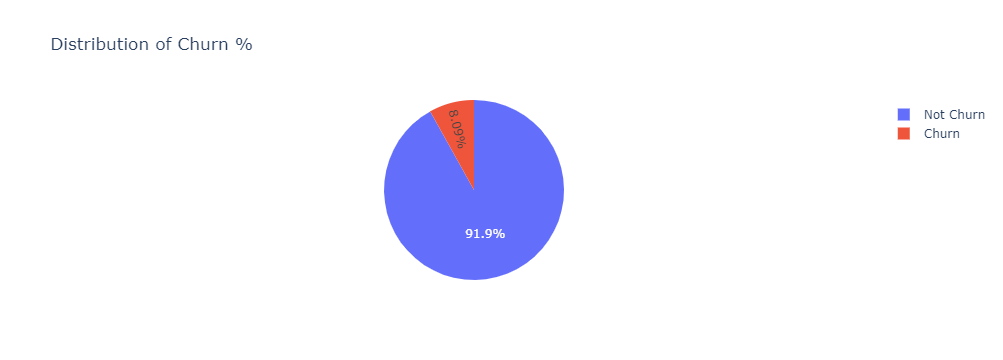

In [27]:
# plotting the number of churn customers 

fig= px.pie(values= churn_count.values, names= ['Not Churn', 'Churn'], title= 'Distribution of Churn %', height= 250)
fig.show()

In [28]:
# dropping attributes corresponding churn phase 

attributes_churn_phase= [col for col in telecom_highval_cust.columns if '_9' in col]

print('Number of Columns before processing: '+ str(telecom_highval_cust.shape[1]), end= '\n\n')
telecom_highval_cust.drop(attributes_churn_phase, axis= 1, inplace= True)
print('Number of Columns after processing: '+ str(telecom_highval_cust.shape[1]))


Number of Columns before processing: 217

Number of Columns after processing: 164


<h3><font color= 'Blue'><span style="font-family:Candara">Handling Missing Values in High Value Customer Data</span></font></h3> 

In [29]:
# let's check the missing values in filtered data 

telecom_highval_null= null_val_cal(telecom_highval_cust)
telecom_highval_null

Columns  Null Values  Null %
57           spl_og_mou_8         1165    3.90
87       std_ic_t2o_mou_8         1165    3.90
39       std_og_t2t_mou_8         1165    3.90
75           loc_ic_mou_8         1165    3.90
33       loc_og_t2c_mou_8         1165    3.90
30       loc_og_t2f_mou_8         1165    3.90
78       std_ic_t2t_mou_8         1165    3.90
42       std_og_t2m_mou_8         1165    3.90
27       loc_og_t2m_mou_8         1165    3.90
69       loc_ic_t2m_mou_8         1165    3.90
81       std_ic_t2m_mou_8         1165    3.90
24       loc_og_t2t_mou_8         1165    3.90
84       std_ic_t2f_mou_8         1165    3.90
21          roam_og_mou_8         1165    3.90
45       std_og_t2f_mou_8         1165    3.90
72       loc_ic_t2f_mou_8         1165    3.90
18          roam_ic_mou_8         1165    3.90
66       loc_ic_t2t_mou_8         1165    3.90
60            og_others_8         1165    3.90
102           ic_others_8         1165    3.90
54           isd_og_mou_8         1165    3.90
99           isd_ic_mou_8         1165    3.90
15           offnet_mou_8         1165    3.90
96           spl_ic_mou_8         1165    3.90
51           std_og_mou_8         1165    3.90
12            onnet_mou_8         1165    3.90
90           std_ic_mou_8         1165    3.90
48       std_og_t2c_mou_8         1165    3.90
36           loc_og_mou_8         1165    3.90
112   date_of_last_rech_8          575    1.93
65       loc_ic_t2t_mou_7          535    1.79
68       loc_ic_t2m_mou_7          535    1.79
59            og_others_7          535    1.79
58            og_others_6          533    1.79
70       loc_ic_t2f_mou_6          533    1.79
71       loc_ic_t2f_mou_7          535    1.79
67       loc_ic_t2m_mou_6          533    1.79
82       std_ic_t2f_mou_6          533    1.79
73           loc_ic_mou_6          533    1.79
74           loc_ic_mou_7          535    1.79
101           ic_others_7          535    1.79
100           ic_others_6          533    1.79
98           isd_ic_mou_7          535    1.79
97           isd_ic_mou_6          533    1.79
95           spl_ic_mou_7          535    1.79
94           spl_ic_mou_6          533    1.79
89           std_ic_mou_7          535    1.79
88           std_ic_mou_6          533    1.79
86       std_ic_t2o_mou_7          535    1.79
85       std_ic_t2o_mou_6          533    1.79
83       std_ic_t2f_mou_7          535    1.79
80       std_ic_t2m_mou_7          535    1.79
56           spl_og_mou_7          535    1.79
77       std_ic_t2t_mou_7          535    1.79
76       std_ic_t2t_mou_6          533    1.79
79       std_ic_t2m_mou_6          533    1.79
64       loc_ic_t2t_mou_6          533    1.79
55           spl_og_mou_6          533    1.79
34           loc_og_mou_6          533    1.79
31       loc_og_t2c_mou_6          533    1.79
29       loc_og_t2f_mou_7          535    1.79
28       loc_og_t2f_mou_6          533    1.79
26       loc_og_t2m_mou_7          535    1.79
25       loc_og_t2m_mou_6          533    1.79
22       loc_og_t2t_mou_6          533    1.79
20          roam_og_mou_7          535    1.79
19          roam_og_mou_6          533    1.79
17          roam_ic_mou_7          535    1.79
16          roam_ic_mou_6          533    1.79
14           offnet_mou_7          535    1.79
13           offnet_mou_6          533    1.79
53           isd_og_mou_7          535    1.79
11            onnet_mou_7          535    1.79
10            onnet_mou_6          533    1.79
32       loc_og_t2c_mou_7          535    1.79
23       loc_og_t2t_mou_7          535    1.79
35           loc_og_mou_7          535    1.79
37       std_og_t2t_mou_6          533    1.79
38       std_og_t2t_mou_7          535    1.79
40       std_og_t2m_mou_6          533    1.79
41       std_og_t2m_mou_7          535    1.79
43       std_og_t2f_mou_6          533    1.79
44       std_og_t2f_mou_7          535    1.79
46       std_og_t2c_mou_6          533    1.79
47       std_og_t2c_mou

In [30]:
# since we are not dealing with dates  we can drop those columns 
col_with_dates= [col for col in telecom_highval_cust.columns if 'date' in col]

#dropping these columns 
telecom_highval_cust.drop(col_with_dates, axis= 1, inplace= True)

In [31]:
# let's check the missing values in filtered data 

telecom_highval_null= null_val_cal(telecom_highval_cust)
telecom_highval_null

Columns  Null Values  Null %
27  loc_og_t2f_mou_8         1165    3.90
84  std_ic_t2o_mou_8         1165    3.90
72      loc_ic_mou_8         1165    3.90
33      loc_og_mou_8         1165    3.90
69  loc_ic_t2f_mou_8         1165    3.90
39  std_og_t2m_mou_8         1165    3.90
30  loc_og_t2c_mou_8         1165    3.90
75  std_ic_t2t_mou_8         1165    3.90
54      spl_og_mou_8         1165    3.90
78  std_ic_t2m_mou_8         1165    3.90
24  loc_og_t2m_mou_8         1165    3.90
42  std_og_t2f_mou_8         1165    3.90
81  std_ic_t2f_mou_8         1165    3.90
21  loc_og_t2t_mou_8         1165    3.90
66  loc_ic_t2m_mou_8         1165    3.90
36  std_og_t2t_mou_8         1165    3.90
18     roam_og_mou_8         1165    3.90
45  std_og_t2c_mou_8         1165    3.90
57       og_others_8         1165    3.90
99       ic_others_8         1165    3.90
87      std_ic_mou_8         1165    3.90
12      offnet_mou_8         1165    3.90
63  loc_ic_t2t_mou_8         1165    3.90
48      std_og_mou_8         1165    3.90
9        onnet_mou_8         1165    3.90
15     roam_ic_mou_8         1165    3.90
93      spl_ic_mou_8         1165    3.90
51      isd_og_mou_8         1165    3.90
96      isd_ic_mou_8         1165    3.90
56       og_others_7          535    1.79
67  loc_ic_t2f_mou_6          533    1.79
62  loc_ic_t2t_mou_7          535    1.79
68  loc_ic_t2f_mou_7          535    1.79
64  loc_ic_t2m_mou_6          533    1.79
65  loc_ic_t2m_mou_7          535    1.79
70      loc_ic_mou_6          533    1.79
79  std_ic_t2f_mou_6          533    1.79
71      loc_ic_mou_7          535    1.79
86      std_ic_mou_7          535    1.79
98       ic_others_7          535    1.79
97       ic_others_6          533    1.79
95      isd_ic_mou_7          535    1.79
94      isd_ic_mou_6          533    1.79
92      spl_ic_mou_7          535    1.79
91      spl_ic_mou_6          533    1.79
85      std_ic_mou_6          533    1.79
73  std_ic_t2t_mou_6          533    1.79
83  std_ic_t2o_mou_7          535    1.79
82  std_ic_t2o_mou_6          533    1.79
80  std_ic_t2f_mou_7          535    1.79
77  std_ic_t2m_mou_7          535    1.79
76  std_ic_t2m_mou_6          533    1.79
74  std_ic_t2t_mou_7          535    1.79
55       og_others_6          533    1.79
61  loc_ic_t2t_mou_6          533    1.79
53      spl_og_mou_7          535    1.79
31      loc_og_mou_6          533    1.79
28  loc_og_t2c_mou_6          533    1.79
26  loc_og_t2f_mou_7          535    1.79
25  loc_og_t2f_mou_6          533    1.79
22  loc_og_t2m_mou_6          533    1.79
20  loc_og_t2t_mou_7          535    1.79
19  loc_og_t2t_mou_6          533    1.79
17     roam_og_mou_7          535    1.79
16     roam_og_mou_6          533    1.79
14     roam_ic_mou_7          535    1.79
13     roam_ic_mou_6          533    1.79
52      spl_og_mou_6          533    1.79
11      offnet_mou_7          535    1.79
10      offnet_mou_6          533    1.79
8        onnet_mou_7          535    1.79
7        onnet_mou_6          533    1.79
29  loc_og_t2c_mou_7          535    1.79
23  loc_og_t2m_mou_7          535    1.79
32      loc_og_mou_7          535    1.79
41  std_og_t2f_mou_7          535    1.79
50      isd_og_mou_7          535    1.79
34  std_og_t2t_mou_6          533    1.79
49      isd_og_mou_6          533    1.79
47      std_og_mou_7          535    1.79
44  std_og_t2c_mou_7          535    1.79
43  std_og_t2c_mou_6          533    1.79
46      std_og_mou_6          533    1.79
40  std_og_t2f_mou_6          533    1.79
38  std_og_t2m_mou_7          535    1.79
37  std_og_t2m_mou_6          533    1.79
35  std_og_t2t_mou_7          535    1.79
1     loc_og_t2o_mou          222    0.74
2     std_og_t2o_mou          222    0.74
3     loc_ic_t2o_mou          222    0.74

In [32]:
# let's check the number of uniques for basic understanding

telecom_highval_uniques= pd.DataFrame()
telecom_highval_uniques['Columns']= telecom_highval_null['Columns']
telecom_highval_uniques['Number of Uniques']= [telecom_highval_cust[col].nunique() for col in telecom_highval_null['Columns']]
telecom_highval_uniques['Unique Values']= [telecom_highval_cust[col].unique() for col in telecom_highval_null['Columns']]
telecom_highval_uniques.sort_values(by= 'Number of Uniques', inplace= True)
telecom_highval_uniques

Columns  Number of Uniques  \
3     loc_ic_t2o_mou                  1   
84  std_ic_t2o_mou_8                  1   
1     loc_og_t2o_mou                  1   
43  std_og_t2c_mou_6                  1   
44  std_og_t2c_mou_7                  1   
82  std_ic_t2o_mou_6                  1   
83  std_ic_t2o_mou_7                  1   
2     std_og_t2o_mou                  1   
45  std_og_t2c_mou_8                  1   
91      spl_ic_mou_6                 78   
93      spl_ic_mou_8                 80   
92      spl_ic_mou_7                 92   
56       og_others_7                114   
57       og_others_8                131   
55       og_others_6                841   
51      isd_og_mou_8                881   
49      isd_og_mou_6               1030   
50      isd_og_mou_7               1032   
97       ic_others_6               1206   
99       ic_others_8               1246   
98       ic_others_7               1357   
42  std_og_t2f_mou_8               1513   
41  std_og_t2f_mou_7               1588   
40  std_og_t2f_mou_6               1654   
28  loc_og_t2c_mou_6               1682   
30  loc_og_t2c_mou_8               1719   
29  loc_og_t2c_mou_7               1759   
81  std_ic_t2f_mou_8               1888   
79  std_ic_t2f_mou_6               1957   
80  std_ic_t2f_mou_7               2016   
27  loc_og_t2f_mou_8               2983   
52      spl_og_mou_6               3048   
25  loc_og_t2f_mou_6               3084   
26  loc_og_t2f_mou_7               3089   
54      spl_og_mou_8               3187   
94      isd_ic_mou_6               3276   
53      spl_og_mou_7               3310   
96      isd_ic_mou_8               3350   
14     roam_ic_mou_7               3375   
15     roam_ic_mou_8               3423   
95      isd_ic_mou_7               3476   
17     roam_og_mou_7               3981   
18     roam_og_mou_8               3989   
13     roam_ic_mou_6               4038   
75  std_ic_t2t_mou_8               4257   
73  std_ic_t2t_mou_6               4393   
74  std_ic_t2t_mou_7               4464   
69  loc_ic_t2f_mou_8               4649   
16     roam_og_mou_6               4736   
67  loc_ic_t2f_mou_6               4745   
68  loc_ic_t2f_mou_7               4811   
78  std_ic_t2m_mou_8               6104   
76  std_ic_t2m_mou_6               6343   
77  std_ic_t2m_mou_7               6442   
87      std_ic_mou_8               7679   
85      std_ic_mou_6               8009   
86      std_ic_mou_7               8125   
63  loc_ic_t2t_mou_8               9352   
61  loc_ic_t2t_mou_6               9495   
62  loc_ic_t2t_mou_7               9644   
21  loc_og_t2t_mou_8              10040   
36  std_og_t2t_mou_8              10207   
20  loc_og_t2t_mou_7              10379   
19  loc_og_t2t_mou_6              10412   
34  std_og_t2t_mou_6              11067   
35  std_og_t2t_mou_7              11211   
39  std_og_t2m_mou_8              11762   
37  std_og_t2m_mou_6              12833   
38  std_og_t2m_mou_7              12841   
48      std_og_mou_8              14661   
66  loc_ic_t2m_mou_8              15088   
24  loc_og_t2m_mou_8              15094   
64  loc_ic_t2m_mou_6              15436   
65  loc_ic_t2m_mou_7              15517   
22  loc_og_t2m_mou_6              15584   
23  loc_og_t2m_mou_7              15631   
9        onnet_mou_8              15817   
46      std_og_mou_6              15874   
47      std_og_mou_7              15896   
7        onnet_mou_6              16850   
8        onnet_mou_7              16941   
33      loc_og_mou_8              17530   
72      loc_ic_mou_8              18021   
31      loc_og_mou_6              18313   
71      loc_ic_mou_7              18450   
32      loc_og_mou_7              18456   
70      loc_ic_mou_6              18475   
12      offnet_mou_8              20101   
10      offnet_mou_6              21155   
11      offnet_mou_7              21198   

                                        Unique Values  
3                                          

In [33]:
# we can drop the columns where number of uniques is 1 
cols_to_drop= telecom_highval_uniques[telecom_highval_uniques['Number of Uniques']==1]['Columns'].to_list()

# dropping these columns 
telecom_highval_cust.drop(cols_to_drop, axis= 1, inplace= True)

In [34]:
# let's check the missing values in filtered data 

telecom_highval_null= null_val_cal(telecom_highval_cust)
telecom_highval_null

Columns  Null Values  Null %
57  loc_ic_t2t_mou_8         1165    3.90
33  std_og_t2t_mou_8         1165    3.90
21  loc_og_t2m_mou_8         1165    3.90
72  std_ic_t2m_mou_8         1165    3.90
69  std_ic_t2t_mou_8         1165    3.90
27  loc_og_t2c_mou_8         1165    3.90
30      loc_og_mou_8         1165    3.90
66      loc_ic_mou_8         1165    3.90
63  loc_ic_t2f_mou_8         1165    3.90
18  loc_og_t2t_mou_8         1165    3.90
36  std_og_t2m_mou_8         1165    3.90
39  std_og_t2f_mou_8         1165    3.90
60  loc_ic_t2m_mou_8         1165    3.90
42      std_og_mou_8         1165    3.90
45      isd_og_mou_8         1165    3.90
51       og_others_8         1165    3.90
75  std_ic_t2f_mou_8         1165    3.90
24  loc_og_t2f_mou_8         1165    3.90
9       offnet_mou_8         1165    3.90
12     roam_ic_mou_8         1165    3.90
90       ic_others_8         1165    3.90
87      isd_ic_mou_8         1165    3.90
6        onnet_mou_8         1165    3.90
84      spl_ic_mou_8         1165    3.90
48      spl_og_mou_8         1165    3.90
15     roam_og_mou_8         1165    3.90
78      std_ic_mou_8         1165    3.90
70  std_ic_t2m_mou_6          533    1.79
82      spl_ic_mou_6          533    1.79
73  std_ic_t2f_mou_6          533    1.79
55  loc_ic_t2t_mou_6          533    1.79
89       ic_others_7          535    1.79
56  loc_ic_t2t_mou_7          535    1.79
58  loc_ic_t2m_mou_6          533    1.79
88       ic_others_6          533    1.79
59  loc_ic_t2m_mou_7          535    1.79
61  loc_ic_t2f_mou_6          533    1.79
62  loc_ic_t2f_mou_7          535    1.79
86      isd_ic_mou_7          535    1.79
85      isd_ic_mou_6          533    1.79
64      loc_ic_mou_6          533    1.79
77      std_ic_mou_7          535    1.79
65      loc_ic_mou_7          535    1.79
71  std_ic_t2m_mou_7          535    1.79
83      spl_ic_mou_7          535    1.79
67  std_ic_t2t_mou_6          533    1.79
68  std_ic_t2t_mou_7          535    1.79
50       og_others_7          535    1.79
76      std_ic_mou_6          533    1.79
74  std_ic_t2f_mou_7          535    1.79
49       og_others_6          533    1.79
28      loc_og_mou_6          533    1.79
25  loc_og_t2c_mou_6          533    1.79
23  loc_og_t2f_mou_7          535    1.79
22  loc_og_t2f_mou_6          533    1.79
20  loc_og_t2m_mou_7          535    1.79
19  loc_og_t2m_mou_6          533    1.79
17  loc_og_t2t_mou_7          535    1.79
16  loc_og_t2t_mou_6          533    1.79
14     roam_og_mou_7          535    1.79
47      spl_og_mou_7          535    1.79
11     roam_ic_mou_7          535    1.79
10     roam_ic_mou_6          533    1.79
8       offnet_mou_7          535    1.79
7       offnet_mou_6          533    1.79
5        onnet_mou_7          535    1.79
4        onnet_mou_6          533    1.79
26  loc_og_t2c_mou_7          535    1.79
13     roam_og_mou_6          533    1.79
29      loc_og_mou_7          535    1.79
38  std_og_t2f_mou_7          535    1.79
46      spl_og_mou_6          533    1.79
44      isd_og_mou_7          535    1.79
31  std_og_t2t_mou_6          533    1.79
43      isd_og_mou_6          533    1.79
40      std_og_mou_6          533    1.79
41      std_og_mou_7          535    1.79
37  std_og_t2f_mou_6          533    1.79
35  std_og_t2m_mou_7          535    1.79
34  std_og_t2m_mou_6          533    1.79
32  std_og_t2t_mou_7          535    1.79

In [35]:
# let's check the numerical statistics of the missing columns 

telecom_highval_cust[telecom_highval_null['Columns'].to_list()].describe()

loc_ic_t2t_mou_8  std_og_t2t_mou_8  loc_og_t2m_mou_8  std_ic_t2m_mou_8  \
count      28691.000000      28691.000000      28691.000000      28691.000000   
mean          65.301721        154.445807        158.163398         29.070492   
std          161.919831        404.309168        236.619731        105.384300   
min            0.000000          0.000000          0.000000          0.000000   
25%            6.390000          0.000000         17.650000          0.000000   
50%           24.810000          1.430000         74.730000          4.410000   
75%           67.785000         88.110000        206.060000         23.150000   
max         4003.210000       8014.430000       4961.330000       5645.860000   

       std_ic_t2t_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  loc_ic_mou_8  \
count      28691.000000      28691.000000  28691.000000  28691.000000   
mean          14.504012          1.773252    245.752207    232.806716   
std           72.846260          7.288892    368.068191    311.662636   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000000     29.735000     48.860000   
50%            0.280000          0.000000    121.090000    137.830000   
75%            7.670000          0.110000    322.320000    295.530000   
max         4309.290000        351.830000  11039.910000   5388.740000   

       loc_ic_t2f_mou_8  loc_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count      28691.000000      28691.000000      28691.000000      28691.000000   
mean          15.006702         81.447746        163.647171          1.651996   
std           44.052826        231.875452        415.567843         11.166630   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          3.840000          0.000000          0.000000   
50%            2.030000         23.280000         12.300000          0.000000   
75%           12.035000         76.280000        128.050000          0.000000   
max         1588.530000      10752.560000      13950.040000        516.910000   

       loc_ic_t2m_mou_8  std_og_mou_8  isd_og_mou_8   og_others_8  \
count      28691.000000  28691.000000  28691.000000  28691.000000   
mean         152.488567    319.748448      2.035839      0.060232   
std          217.499640    616.955550     45.719106      3.389942   
min            0.000000      0.000000      0.000000      0.000000   
25%           29.680000      0.000000      0.000000      0.000000   
50%           85.930000     32.710000      0.000000      0.000000   
75%          191.985000    383.485000      0.000000      0.000000   
max         4643.490000  13980.060000   5681.540000    394.930000   

       std_ic_t2f_mou_8  loc_og_t2f_mou_8  offnet_mou_8  roam_ic_mou_8  \
count      28691.000000      28691.000000  28691.000000   28691.000000   
mean           2.673966          6.132879    348.894095      13.029458   
std           20.336763         19.889571    486.374270      75.704783   
min            0.000000          0.000000      0.000000       0.000000   
25%            0.000000          0.000000     58.860000       0.000000   
50%            0.000000          0.000000    197.840000       0.000000   
75%            0.210000          4.260000    455.690000       0.000000   
max         1394.890000        928.490000  14007.340000    4169.810000   

        ic_others_8  isd_ic_mou_8   onnet_mou_8  spl_ic_mou_8  spl_og_mou_8  \
count  28691.000000  28691.000000  28691.000000  28691.000000  28691.000000   
mean       1.275502     11.443526    243.825378      0.027651      6.822423   
std       13.061917     71.789839    465.320130      0.112787     20.674032   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000     14.330000      0.000000      0.000000   
50%        0.000000      0.000000     73.030000      0.000000      0.660000   
75%        0.060000      0.000000    255.140000

In [36]:
# let's impute the remaining columns with SimpleImputer using 'median' strategy

# initiate the object SimpleImputer
simple_impute= SimpleImputer(strategy= 'median')

# let's fit and transform the telecom_highval_cust
y= simple_impute.fit_transform(telecom_highval_cust)

telecom_highval_cust= pd.DataFrame(y, columns= telecom_highval_cust.columns)

In [37]:
# let's verify the null %'s

null_val_cal(telecom_highval_cust)

Empty DataFrame
Columns: [Columns, Null Values, Null %]
Index: []

<h2><font color= 'Blue'><span style="font-family:Candara">6. Data Preparation</span></font></h2> 

<h3><font color= 'Blue'><span style="font-family:Candara">Derving Good Phase Customers</span></font></h3>

In [38]:
# let's check the number of uniques for basic understanding

telecom_highval_uniques= pd.DataFrame()
telecom_highval_uniques['Columns']= telecom_highval_cust.columns
telecom_highval_uniques['Number of Uniques']= [telecom_highval_cust[col].nunique() for col in telecom_highval_cust.columns]
telecom_highval_uniques['Unique Values']= [telecom_highval_cust[col].unique() for col in telecom_highval_cust.columns]
telecom_highval_uniques.sort_values(by= 'Number of Uniques', inplace= True)
telecom_highval_uniques

Columns  Number of Uniques  \
148                  Churn                  2   
122       night_pck_user_6                  2   
124       night_pck_user_8                  2   
137              fb_user_6                  2   
123       night_pck_user_7                  2   
139              fb_user_8                  2   
138              fb_user_7                  2   
125           monthly_2g_6                  5   
127           monthly_2g_8                  6   
126           monthly_2g_7                  6   
133           monthly_3g_8                 12   
131           monthly_3g_6                 12   
132           monthly_3g_7                 15   
134            sachet_3g_6                 25   
107        count_rech_3g_6                 25   
135            sachet_3g_7                 27   
108        count_rech_3g_7                 28   
136            sachet_3g_8                 29   
109        count_rech_3g_8                 29   
104        count_rech_2g_6                 31   
128            sachet_2g_6                 31   
130            sachet_2g_8                 34   
106        count_rech_2g_8                 34   
129            sachet_2g_7                 35   
105        count_rech_2g_7                 36   
101        max_rech_data_6                 48   
103        max_rech_data_8                 49   
102        max_rech_data_7                 49   
82            spl_ic_mou_6                 78   
84            spl_ic_mou_8                 80   
83            spl_ic_mou_7                 92   
93        total_rech_num_8                 96   
92        total_rech_num_7                101   
91        total_rech_num_6                102   
50             og_others_7                114   
51             og_others_8                131   
99      last_day_rch_amt_7                152   
98      last_day_rch_amt_6                154   
96          max_rech_amt_7                161   
95          max_rech_amt_6                170   
100     last_day_rch_amt_8                181   
97          max_rech_amt_8                182   
49             og_others_6                841   
45            isd_og_mou_8                881   
43            isd_og_mou_6               1030   
44            isd_og_mou_7               1032   
88             ic_others_6               1206   
90             ic_others_8               1246   
89             ic_others_7               1357   
39        std_og_t2f_mou_8               1513   
38        std_og_t2f_mou_7               1588   
144  total_data_rech_amt_8               1615   
37        std_og_t2f_mou_6               1654   
25        loc_og_t2c_mou_6               1682   
27        loc_og_t2c_mou_8               1719   
26        loc_og_t2c_mou_7               1759   
75        std_ic_t2f_mou_8               1888   
73        std_ic_t2f_mou_6               1957   
74        std_ic_t2f_mou_7               2016   
94        total_rech_amt_8               2303   
24        loc_og_t2f_mou_8               2983   
46            spl_og_mou_6               3048   
22        loc_og_t2f_mou_6               3084   
23        loc_og_t2f_mou_7               3089   
48            spl_og_mou_8               3187   
85            isd_ic_mou_6               3276   
140                    aon               3294   
47            spl_og_mou_7               3310   
87            isd_ic_mou_8               3350   
11           roam_ic_mou_7               3375   
12           roam_ic_mou_8               3423   
86            isd_ic_mou_7               3476   
145             amt_rech_6               3800   
14           roam_og_mou_7               3981   
15           roam_og_mou_8               3989   
146             amt_rech_7               4014   
10           roam_ic_mou_6               4038   
69        std_ic_t2t_mou_8               4257   
67        std_ic_t2t_mou_6               4393   
68        std_ic_t2t_mou_7               4464   
63        loc_ic_t2f_mou_8               4649   
1

In [39]:
# let's list all the columns belong to June Month 
cols_6= [col.rstrip('_6') for col in telecom_highval_cust if col.endswith('_6')]

# let's list all the columns belong to July Month 
cols_7= [col.rstrip('_7') for col in telecom_highval_cust if col.endswith('_7')]

# let's list all the columns belong to Aug Month 
cols_8= [col.rstrip('_8') for col in telecom_highval_cust if col.endswith('_8')]

In [40]:
# let's check if cols_6 & cols_7 are equal 

cols_6== cols_7

True

In [41]:
# since both are equal 

cols= cols_6.copy()

In [42]:
# removing category colums 

cols.remove('fb_user')
cols.remove('night_pck_user')

In [43]:
# let's check the shape before processing 

print('The dimensions of high value customers before processing: '+str(telecom_highval_cust.shape))

The dimensions of high value customers before processing: (29856, 149)


In [44]:
# let's derive a good phase by replacing X_6 and X_7 as a mean 

for col in cols: 
    col_6= col+'_6'
    col_7= col+'_7'
    col_good_phase= col+'_good_phase'
    telecom_highval_cust[col_good_phase]= telecom_highval_cust[[col_6, col_7]].mean(axis= 1)
    telecom_highval_cust.drop([col_6,col_7], axis= 1, inplace= True)

In [45]:
# let's check the shape after processing 

print('The dimensions of high value customers after processing: '+str(telecom_highval_cust.shape))

The dimensions of high value customers after processing: (29856, 103)


<h3><font color= 'Blue'><span style="font-family:Candara">Exploratory Data Analysis</span></font></h3> 

In [46]:
# let's define different set of columns 

rech_cols= [col for col in telecom_highval_cust.columns if 'rech' in col or 'rch' in col]
amt_cols= [col for col in telecom_highval_cust.columns if 'amt' in col]
arpu_cols= [col for col in telecom_highval_cust.columns if 'arpu' in col]
g2_cols= [col for col in telecom_highval_cust.columns if '2g' in col]
g3_cols= [col for col in telecom_highval_cust.columns if '3g' in col]

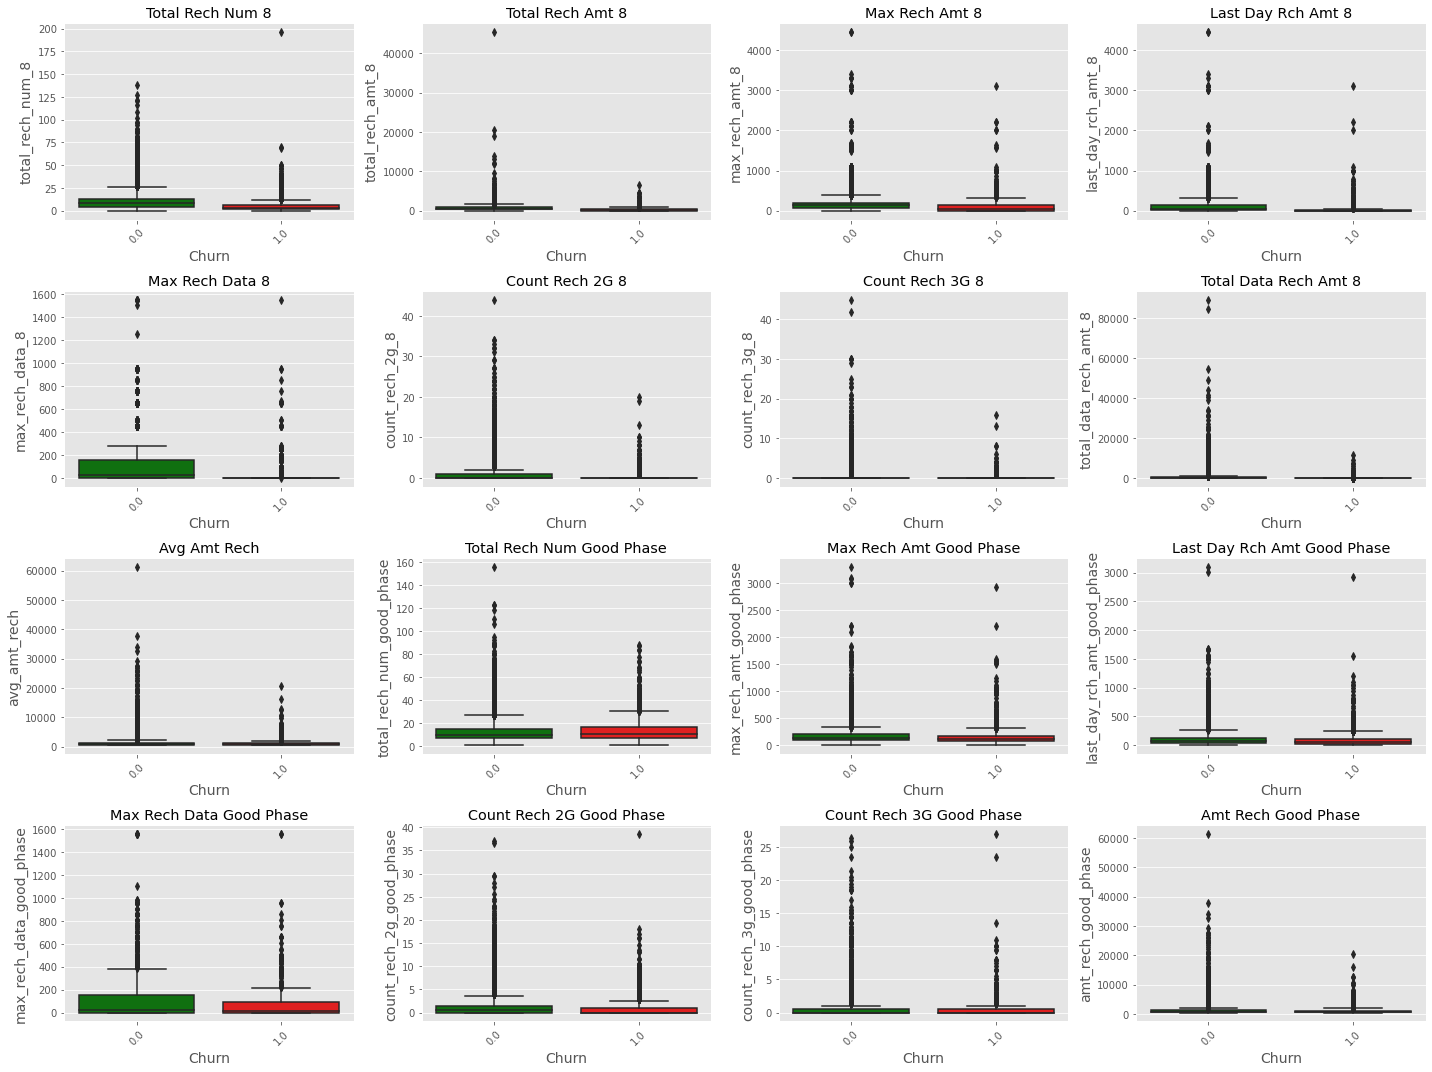

In [47]:
# plotting reach_cols w.r.t churn 

plt.style.use('ggplot')
fig, axes= plt.subplots(4,4, figsize= (20,15))
for i, ax in enumerate(fig.axes):
    if i < len(rech_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=rech_cols[i], data=telecom_highval_cust, x='Churn', ax=ax,palette = ['g','r'])
        ax.set_title(str(' '.join(rech_cols[i].split('_'))).title())
        ax.set_ylabel(rech_cols[i],fontsize=14)
        ax.set_xlabel('Churn',fontsize=14)
        
fig.tight_layout()

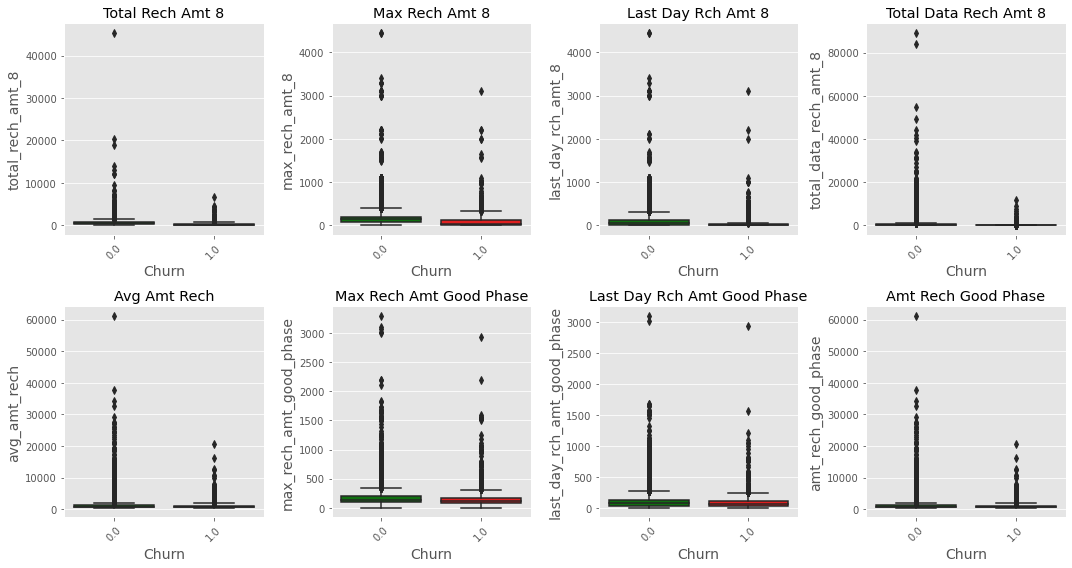

In [48]:
# plotting amt_col w.r.t churn 

plt.style.use('ggplot')
fig, axes= plt.subplots(2,4, figsize= (15,8))
for i, ax in enumerate(fig.axes):
    if i < len(amt_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=amt_cols[i], data=telecom_highval_cust, x='Churn', ax=ax,palette = ['g','r'])
        ax.set_title(str(' '.join(amt_cols[i].split('_'))).title())
        ax.set_ylabel(amt_cols[i],fontsize=14)
        ax.set_xlabel('Churn',fontsize=14)
        
fig.tight_layout()

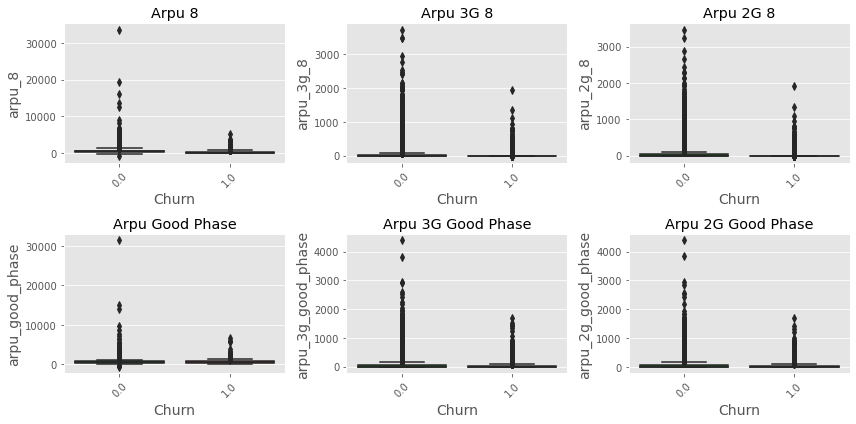

In [49]:
# plotting arpu_cols w.r.t churn 

plt.style.use('ggplot')
fig, axes= plt.subplots(2,3, figsize= (12,6))
for i, ax in enumerate(fig.axes):
    if i < len(arpu_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=arpu_cols[i], data=telecom_highval_cust, x='Churn', ax=ax,palette = ['g','r'])
        ax.set_title(str(' '.join(arpu_cols[i].split('_'))).title())
        ax.set_ylabel(arpu_cols[i],fontsize=14)
        ax.set_xlabel('Churn',fontsize=14)
        
fig.tight_layout()

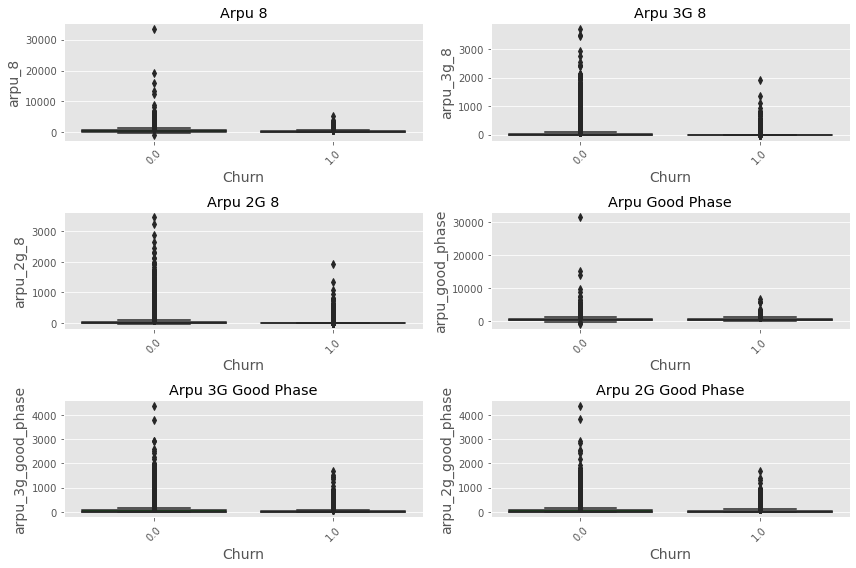

In [50]:
# plotting arpu_cols w.r.t churn 

plt.style.use('ggplot')
fig, axes= plt.subplots(3,2, figsize= (12,8))
for i, ax in enumerate(fig.axes):
    if i < len(arpu_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=arpu_cols[i], data=telecom_highval_cust, x='Churn', ax=ax,palette = ['g','r'])
        ax.set_title(str(' '.join(arpu_cols[i].split('_'))).title())
        ax.set_ylabel(arpu_cols[i],fontsize=14)
        ax.set_xlabel('Churn',fontsize=14)
        
fig.tight_layout()

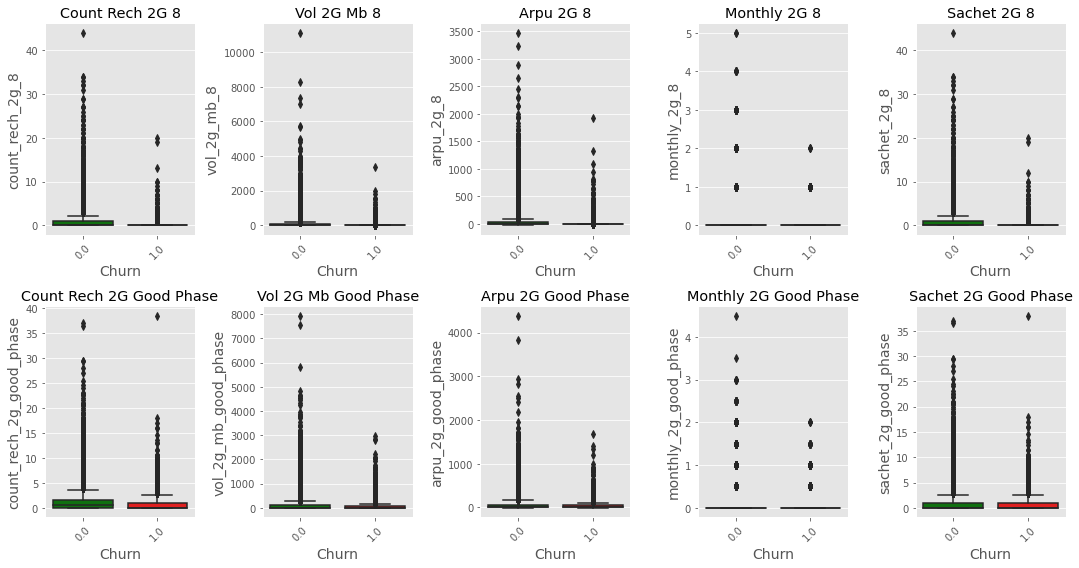

In [51]:
# plotting g2_cols w.r.t churn 

plt.style.use('ggplot')
fig, axes= plt.subplots(2,5, figsize= (15,8))
for i, ax in enumerate(fig.axes):
    if i < len(g2_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=g2_cols[i], data=telecom_highval_cust, x='Churn', ax=ax,palette = ['g','r'])
        ax.set_title(str(' '.join(g2_cols[i].split('_'))).title())
        ax.set_ylabel(g2_cols[i],fontsize=14)
        ax.set_xlabel('Churn',fontsize=14)
        
fig.tight_layout()

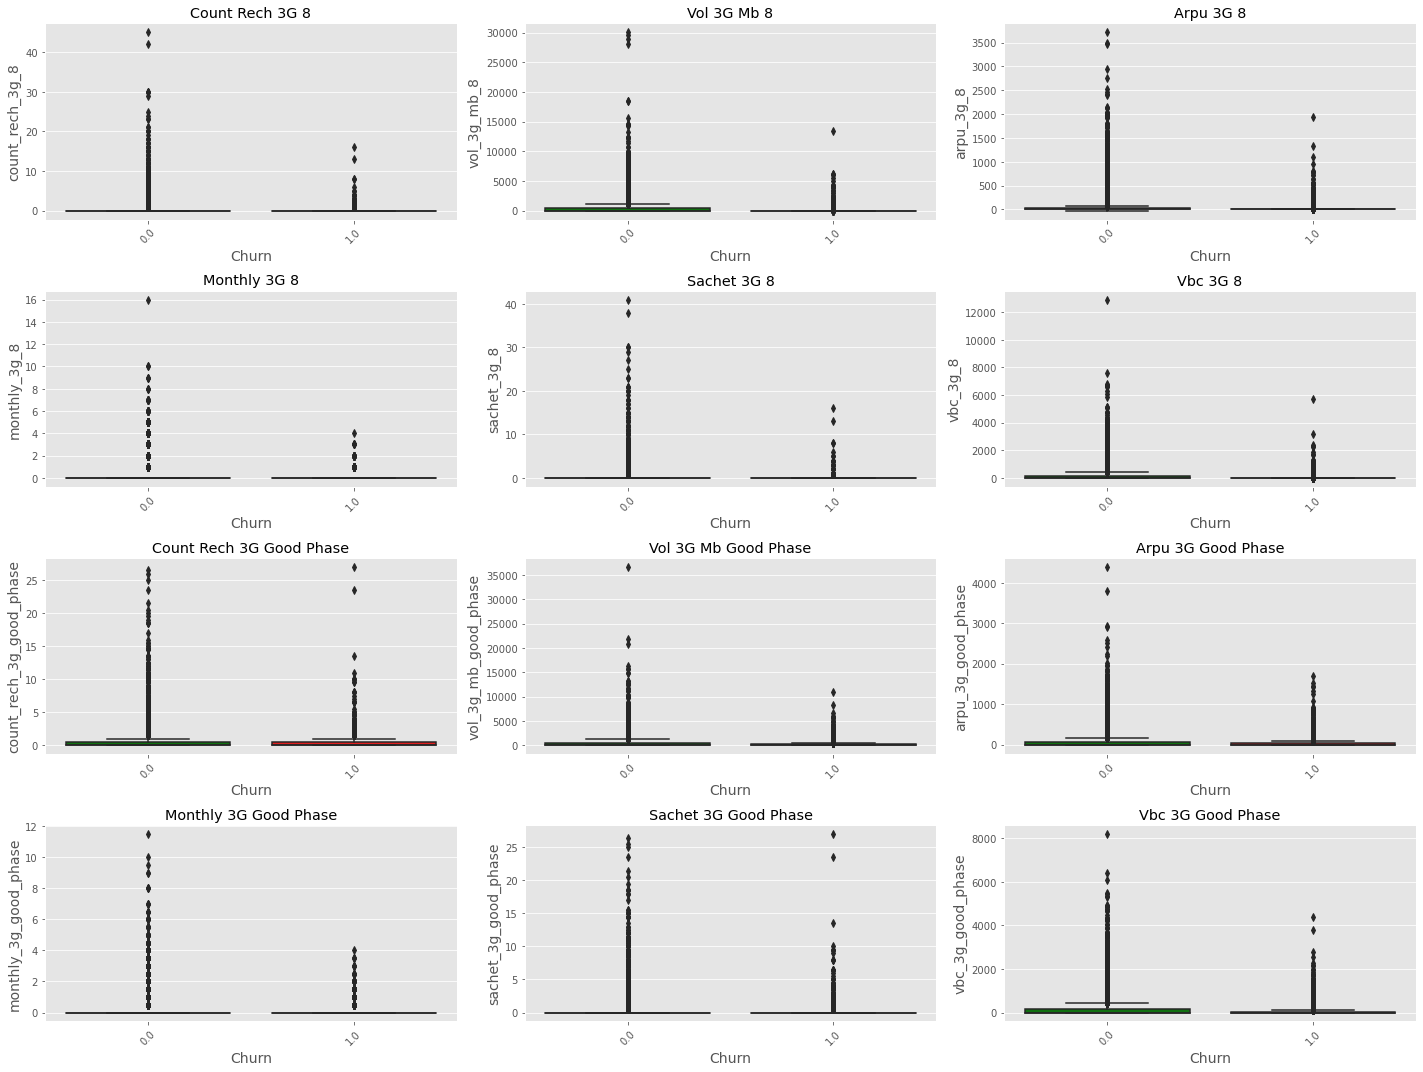

In [52]:
# plotting g3_cols w.r.t churn 

plt.style.use('ggplot')
fig, axes= plt.subplots(4,3, figsize= (20,15))
for i, ax in enumerate(fig.axes):
    if i < len(g3_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=g3_cols[i], data=telecom_highval_cust, x='Churn', ax=ax,palette = ['g','r'])
        ax.set_title(str(' '.join(g3_cols[i].split('_'))).title())
        ax.set_ylabel(g3_cols[i],fontsize=14)
        ax.set_xlabel('Churn',fontsize=14)
        
fig.tight_layout()

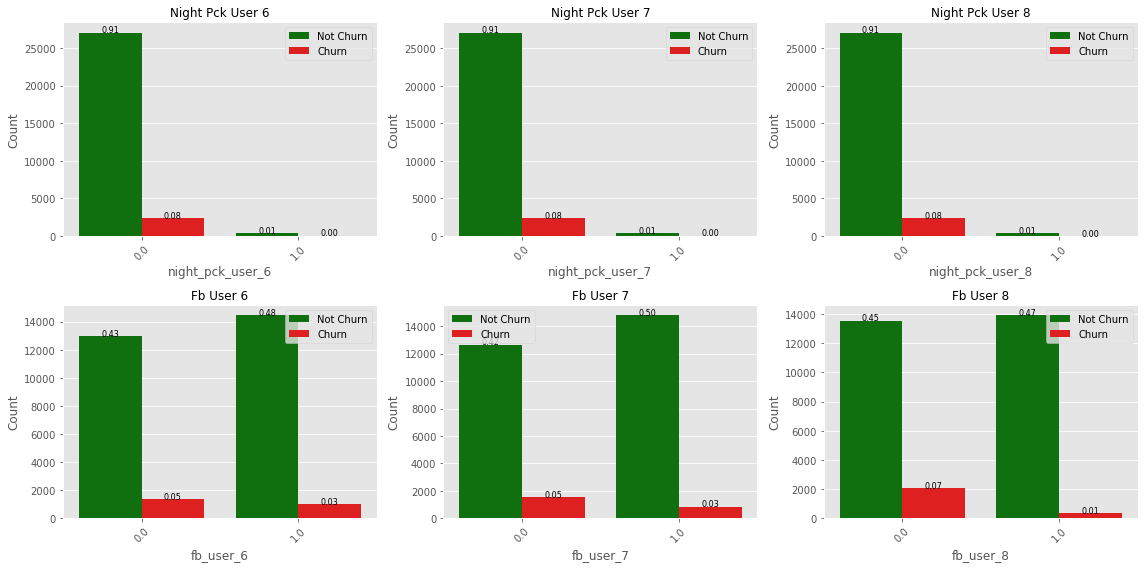

In [53]:
# plotting churn w.r.t different categorical columns 

cat_cols= ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
total= float(len(telecom_highval_cust))
plt.style.use('ggplot')
fig, axes= plt.subplots(2,3, figsize= (16,8))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(data= telecom_highval_cust,x= cat_cols[i],hue= 'Churn', ax=ax,palette = ['g','r'])
        ax.legend(['Not Churn','Churn'],loc="best")
        ax.set_title(str(' '.join(cat_cols[i].split('_'))).title(), fontsize= 12)
        ax.set_ylabel('Count',fontsize=12)
        ax.set_xlabel(cat_cols[i],fontsize=12)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3,
                    '{:1.2f}'.format(height/total),
                    ha="center",
                    fontsize=8)
        
        
fig.tight_layout()

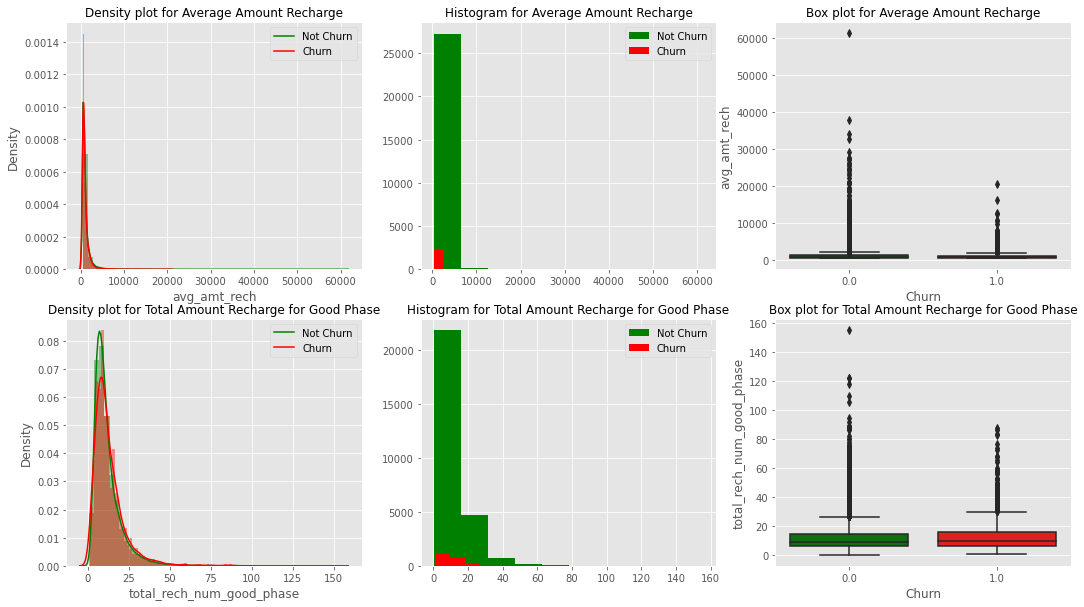

In [54]:
# Data Distribution

plt.figure(figsize = (18,10))
plt.subplot(2,3,1)
sns.distplot(telecom_highval_cust.loc[telecom_highval_cust['Churn']==0,'avg_amt_rech'],hist=True, color = 'g')
sns.distplot(telecom_highval_cust.loc[telecom_highval_cust['Churn']==1,'avg_amt_rech'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])
plt.title('Density plot for Average Amount Recharge', fontsize= 12)

plt.subplot(2,3,2)
plt.hist(telecom_highval_cust.loc[telecom_highval_cust['Churn']==0,'avg_amt_rech'],color = 'g')
plt.hist(telecom_highval_cust.loc[telecom_highval_cust['Churn']==1,'avg_amt_rech'],color = 'r')
plt.legend(['Not Churn','Churn'])
plt.title('Histogram for Average Amount Recharge', fontsize= 12)

plt.subplot(2,3,3)
sns.boxplot(y='avg_amt_rech', data=telecom_highval_cust, x='Churn',palette =['g','r'])
plt.title('Box plot for Average Amount Recharge', fontsize= 12)

plt.subplot(2,3,4)
sns.distplot(telecom_highval_cust.loc[telecom_highval_cust['Churn']==0,'total_rech_num_good_phase'],hist=True, color = 'g')
sns.distplot(telecom_highval_cust.loc[telecom_highval_cust['Churn']==1,'total_rech_num_good_phase'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])
plt.title('Density plot for Total Amount Recharge for Good Phase', fontsize= 12)

plt.subplot(2,3,5)
plt.hist(telecom_highval_cust.loc[telecom_highval_cust['Churn']==0,'total_rech_num_good_phase'],color = 'g')
plt.hist(telecom_highval_cust.loc[telecom_highval_cust['Churn']==1,'total_rech_num_good_phase'],color = 'r')
plt.legend(['Not Churn','Churn'])
plt.title('Histogram for Total Amount Recharge for Good Phase', fontsize= 12)

plt.subplot(2,3,6)
sns.boxplot(y='total_rech_num_good_phase', data=telecom_highval_cust, x='Churn',palette =['g','r'])
plt.title('Box plot for Total Amount Recharge for Good Phase', fontsize= 12)

plt.show()


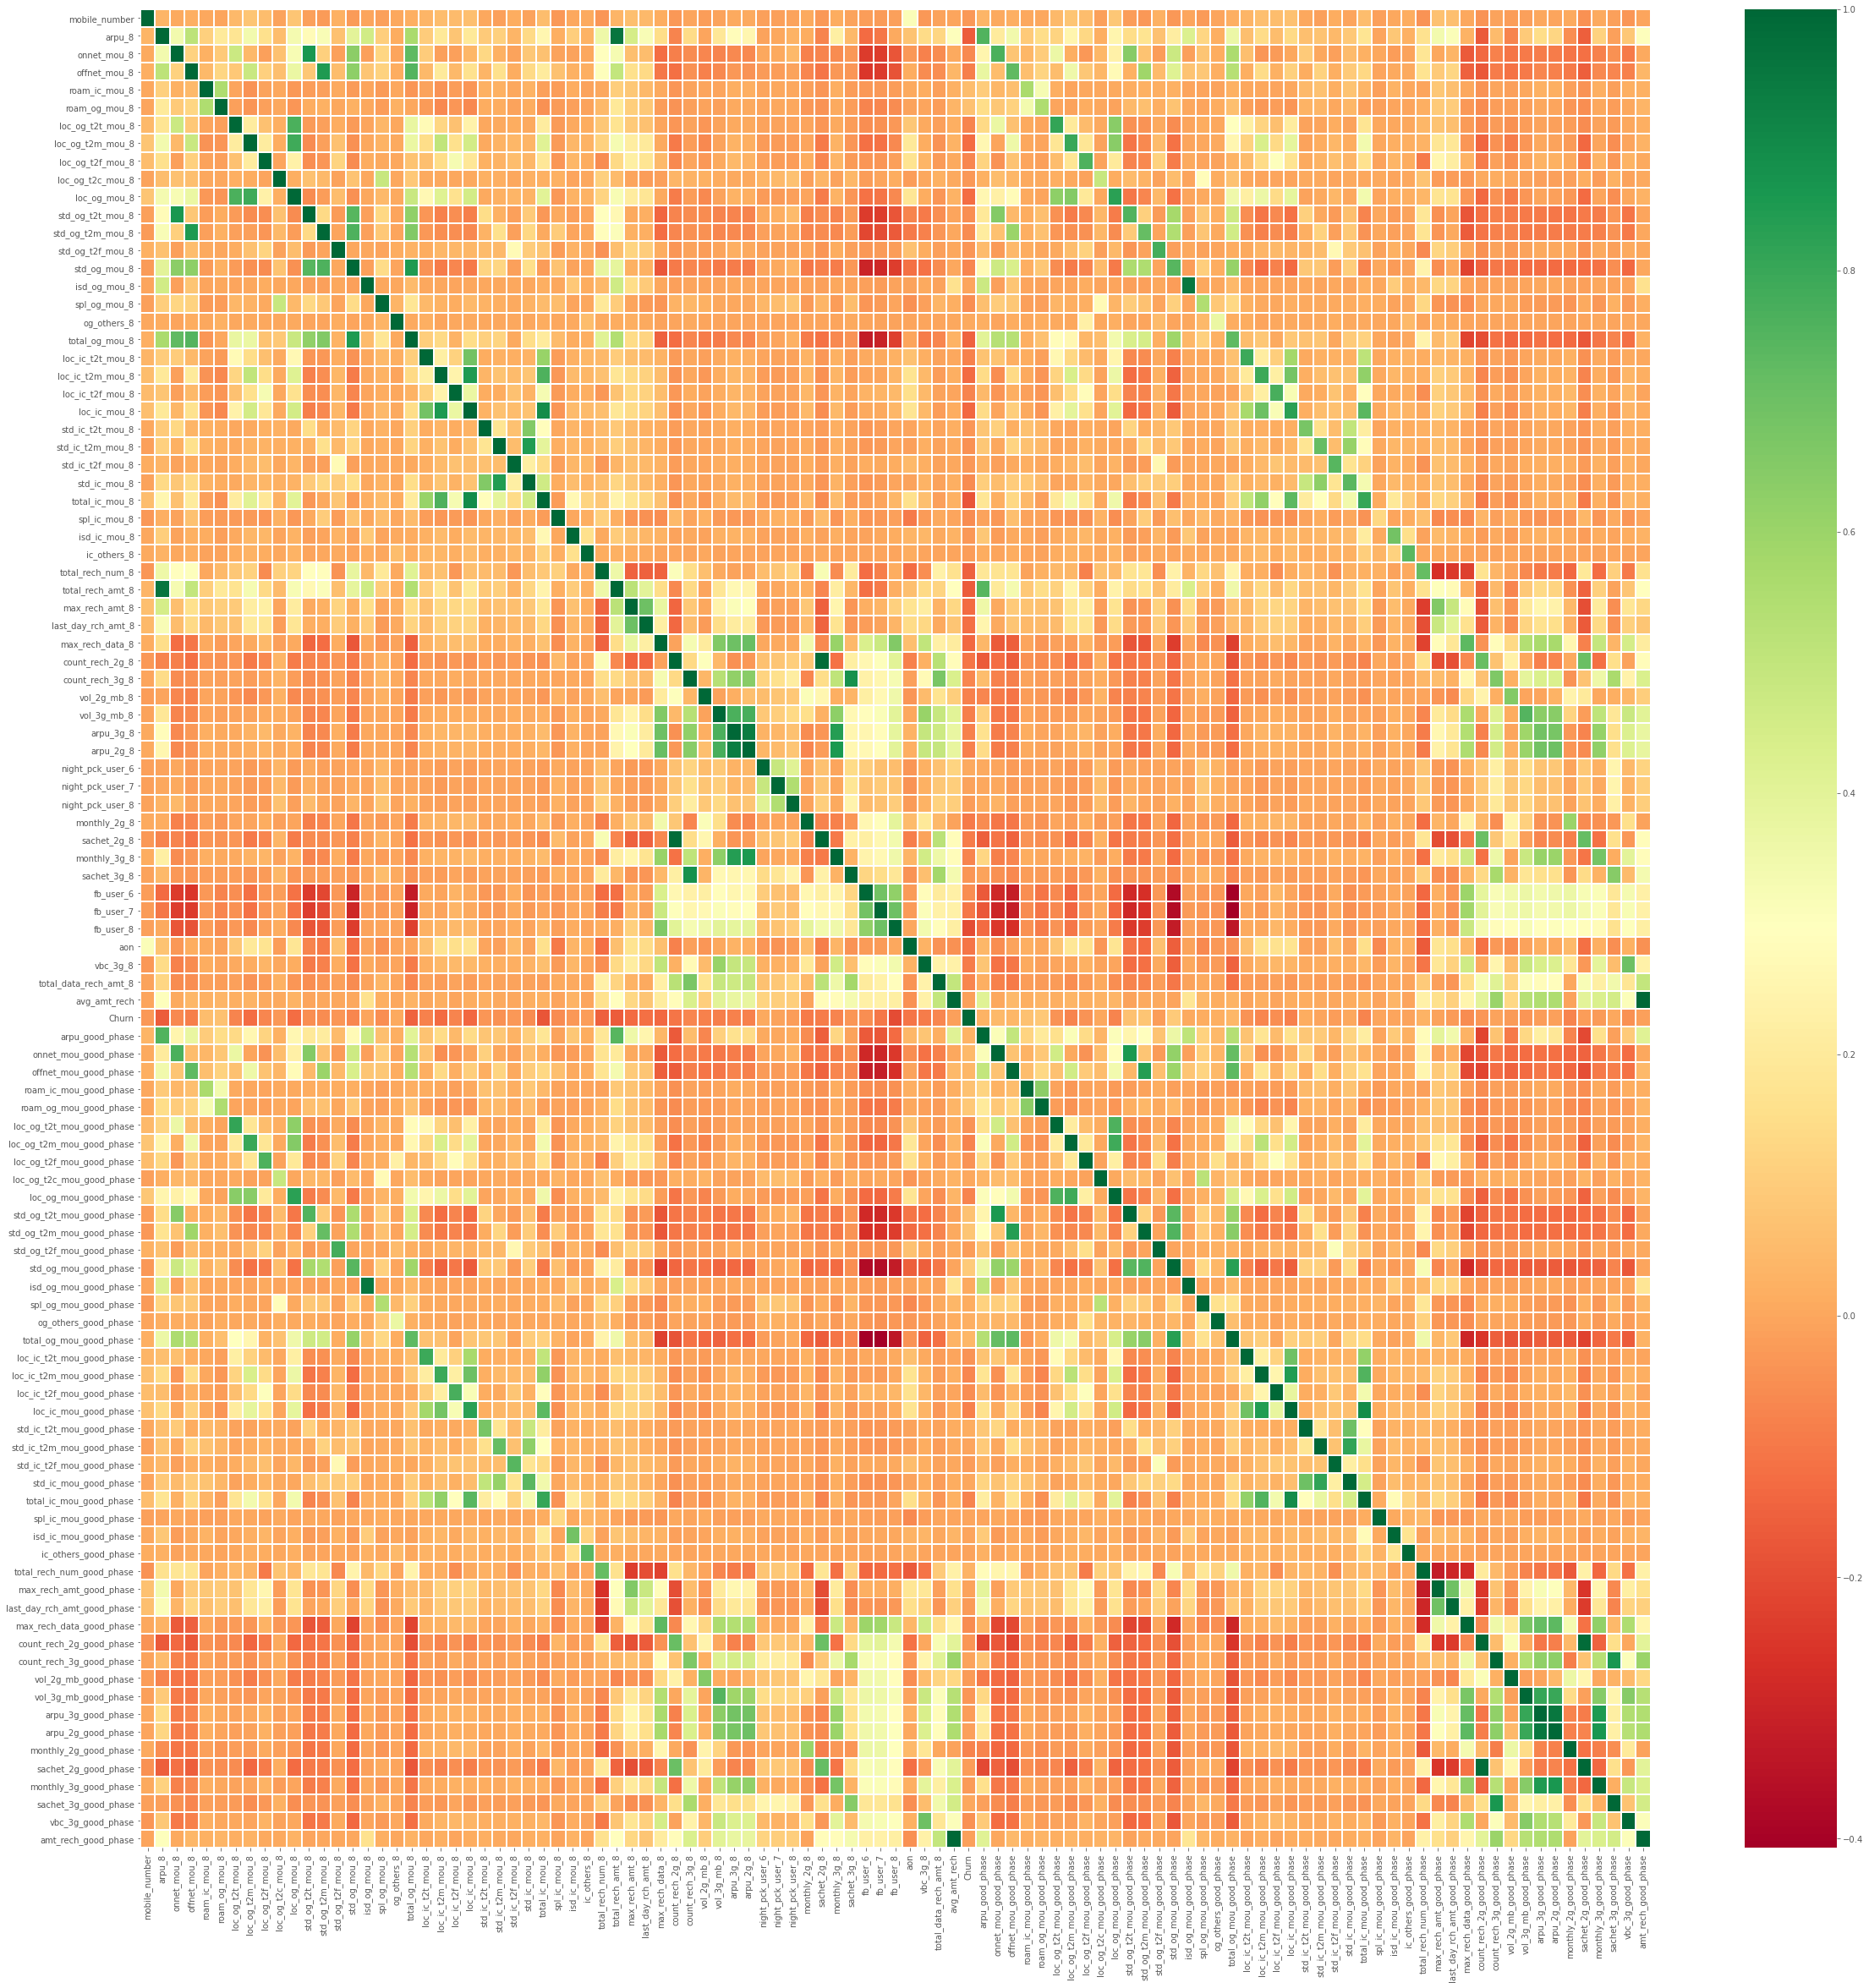

In [55]:
# plotting correlation matrix using heatmap

fig, ax= plt.subplots(figsize= (40,40))
sns.heatmap(telecom_highval_cust.corr(), cmap= 'RdYlGn', linewidth= 1)
plt.show()

<h3><font color= 'Blue'><span style="font-family:Candara">Outlier Treatment</span></font></h3> 

In [56]:
# let's take the columns to check the skewness and perform the outlier treatment
cols_in_highval_cust= telecom_highval_cust.columns.to_list()

cols_in_highval_cust.remove('Churn')
cols_in_highval_cust.remove('night_pck_user_6')
cols_in_highval_cust.remove('night_pck_user_7')
cols_in_highval_cust.remove('night_pck_user_8')
cols_in_highval_cust.remove('fb_user_6')
cols_in_highval_cust.remove('fb_user_7')
cols_in_highval_cust.remove('fb_user_8')
cols_in_highval_cust.remove('mobile_number')

In [57]:
# let's check the skewness in data 

telecom_highval_skew= pd.DataFrame()
telecom_highval_skew['Columns']= cols_in_highval_cust
telecom_highval_skew['Skewness']= [telecom_highval_cust[col].skew() for col in cols_in_highval_cust]
telecom_highval_skew.sort_values(by= 'Skewness', ascending= False, inplace= True, ignore_index= True)

In [58]:
# checking the skewness of columns

telecom_highval_skew

Columns   Skewness
0                   og_others_8  99.936396
1                  isd_og_mou_8  89.334989
2         isd_og_mou_good_phase  89.289643
3          og_others_good_phase  81.589718
4         spl_ic_mou_good_phase  58.155565
5          ic_others_good_phase  55.197905
6                   ic_others_8  46.967673
7              std_ic_t2f_mou_8  35.525265
8     std_ic_t2f_mou_good_phase  32.447509
9     std_ic_t2t_mou_good_phase  30.553805
10        isd_ic_mou_good_phase  28.383499
11             std_ic_t2t_mou_8  23.766946
12    loc_og_t2c_mou_good_phase  21.541425
13        total_data_rech_amt_8  19.131417
14        spl_og_mou_good_phase  18.838845
15                roam_ic_mou_8  18.664842
16             total_rech_amt_8  17.895171
17             std_ic_t2m_mou_8  17.649960
18             std_og_t2f_mou_8  17.471998
19              arpu_good_phase  17.443105
20                 isd_ic_mou_8  17.417609
21    loc_og_t2f_mou_good_phase  17.417339
22             loc_og_t2c_mou_8  16.690478
23    std_og_t2f_mou_good_phase  16.416275
24                       arpu_8  15.316666
25                roam_og_mou_8  14.533568
26                 spl_og_mou_8  14.471670
27             loc_og_t2t_mou_8  14.119617
28       roam_ic_mou_good_phase  13.972592
29                 std_ic_mou_8  13.083333
30                  sachet_3g_8  13.064001
31             loc_og_t2f_mou_8  12.710140
32        std_ic_mou_good_phase  12.679705
33    std_ic_t2m_mou_good_phase  12.190564
34         sachet_3g_good_phase  11.412418
35    loc_ic_t2t_mou_good_phase  11.128019
36                 avg_amt_rech  11.003494
37          amt_rech_good_phase  11.003494
38             loc_ic_t2f_mou_8  10.934061
39             loc_ic_t2t_mou_8  10.559041
40                 spl_ic_mou_8  10.045745
41              count_rech_3g_8   9.713632
42    loc_ic_t2f_mou_good_phase   9.598568
43    loc_og_t2t_mou_good_phase   9.355862
44                  vol_3g_mb_8   8.809601
45       roam_og_mou_good_phase   8.803566
46         vol_3g_mb_good_phase   8.601537
47           last_day_rch_amt_8   7.988540
48                  vol_2g_mb_8   7.741127
49     count_rech_3g_good_phase   7.739103
50             std_og_t2m_mou_8   7.342130
51               max_rech_amt_8   6.272255
52           arpu_2g_good_phase   6.071776
53         vol_2g_mb_good_phase   5.839979
54           arpu_3g_good_phase   5.614177
55                    arpu_3g_8   5.483891
56                     vbc_3g_8   5.483252
57                    arpu_2g_8   5.427800
58  last_day_rch_amt_good_phase   5.422892
59                 loc_og_mou_8   5.380017
60             std_og_t2t_mou_8   5.306856
61                  onnet_mou_8   5.087051
62                 offnet_mou_8   5.078435
63             loc_ic_t2m_mou_8   5.020942
64                 monthly_3g_8   4.875784
65    loc_ic_t2m_mou_good_phase   4.710228
66      max_rech_amt_good_phase   4.699469
67            vbc_3g_good_phase   4.631356
68        monthly_3g_good_phase   4.565455
69    std_og_t2m_mou_good_phase   4.542012
70    std_og_t2t_mou_good_phase   4.326898
71        loc_ic_mou_good_phase   4.279155
72                 loc_ic_mou_8   4.249272
73                 std_og_mou_8   4.172223
74             loc_og_t2m_mou_8   4.128025
75        loc_og_mou_good_phase   4.016757
76      total_ic_mou_good_phase   4.013037
77                  sachet_2g_8   3.882291
78               total_ic_mou_8   3.839482
79         onnet_mou_good_phase   3.835291
80    loc_og_t2m_mou_good_phase   3.797365
81              count_rech_2g_8   3.770148
82         sachet_2g_good_phase   3.437823
83        offnet_mou_good_phase   3.371803
84     count_rech_2g_good_phase   3.345935
85               total_og_mou_8   3.278669
86        std_og_mou_good_phase   2.941836
87             total_rech_num_8   2.932268
88                 monthly_2g_8   2.920660
89    total_rech_num_good_phase   2.823773
90              max_rech_data_8   2.797357
91     max_rech_data_good_phase   2.750460
92      total_og_mou_good

In [59]:
# performing the boxcox transformation for the columns having skewness > 2 

for col in cols_in_highval_cust: 
    if telecom_highval_cust[col].skew() > 2: 
        telecom_highval_cust[col]= boxcox1p(telecom_highval_cust[col], 0)

In [60]:
# let's check the skewness in data 

telecom_highval_skew= pd.DataFrame()
telecom_highval_skew['Columns']= cols_in_highval_cust
telecom_highval_skew['Skewness']= [telecom_highval_cust[col].skew() for col in cols_in_highval_cust]
telecom_highval_skew.sort_values(by= 'Skewness', ascending= False, inplace= True, ignore_index= True)

In [61]:
telecom_highval_cust.dropna(inplace= True)

In [62]:
telecom_highval_cust= telecom_highval_cust[~((telecom_highval_cust['arpu_8']== -np.inf) | (telecom_highval_cust['arpu_2g_good_phase']== -np.inf))]

<h3><font color= 'Blue'><span style="font-family:Candara">Train Test Split</span></font></h3> 

In [63]:
# let's check the shape 

telecom_highval_cust.shape

(29624, 103)

In [64]:
# let's split the data into training and test data for model building in the ratio of 70:30 

# let's drop the mobile_number from the data 
telecom_highval_cust.drop('mobile_number', axis= 1, inplace= True)

# let's define the Dependendent and independent variables 
y= telecom_highval_cust.pop('Churn')
X= telecom_highval_cust

# let's split the data 
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7, random_state= 0)

# printing the shapes 
print(X_train.shape, X_test.shape, end= '\n\n')
print(y_train.shape, y_test.shape)

(20736, 101) (8888, 101)

(20736,) (8888,)


<h3><font color= 'Blue'><span style="font-family:Candara">Feature Scaling</span></font></h3> 

In [65]:
# let's scale the data using StandardScaler

feature_scaling= []
for col in X_train.columns: 
    if X_train[col].nunique() >2: 
        feature_scaling.append(col)

In [66]:
# downcasting the columns to float32 

for col in feature_scaling:
    X_train[col]= X_train[col].astype('float')
    X_test[col]= X_test[col].astype('float')    

In [67]:
# initiating the scaler object 
scaler= StandardScaler() 

# fit and transform the feature_scaling columns 
X_train[feature_scaling]= scaler.fit_transform(X_train[feature_scaling])
X_test[feature_scaling]= scaler.transform(X_test[feature_scaling])


<h3><font color= 'Blue'><span style="font-family:Candara">Handling Class Imbalance</span></font></h3> 

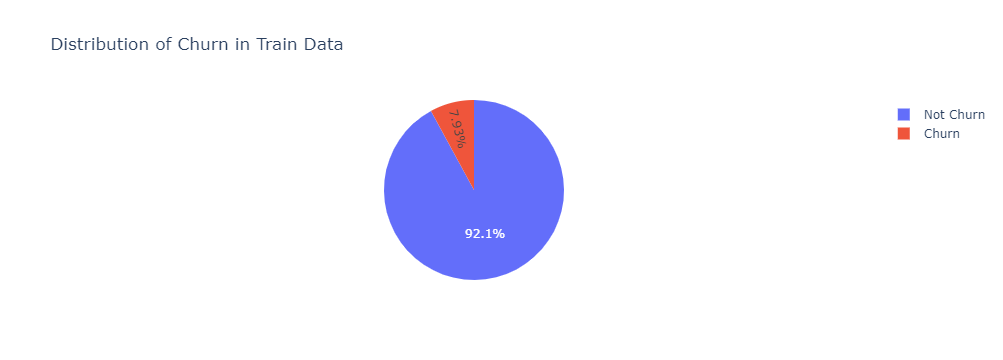

In [68]:
# let's plot the target variable in training data 

fig= px.pie(values= y_train.value_counts(), names= ['Not Churn', 'Churn'], title= 'Distribution of Churn in Train Data', height= 250)
fig.show()

In [69]:
# since there is a huge class imbalance in train data we need to deal with the imbalancing technique and start working on model building 


sm = SMOTE(random_state = 0) 
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train) 

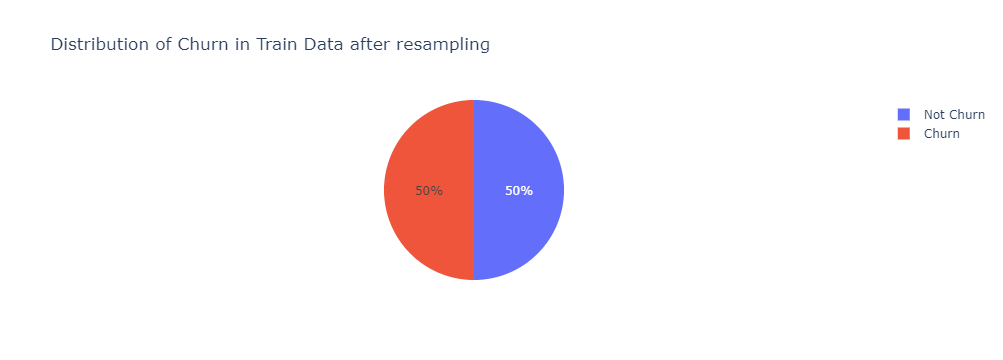

In [70]:
# let's plot the target variable in training data after resampling 

fig= px.pie(values= y_train_smote.value_counts(), names= ['Not Churn', 'Churn'], title= 'Distribution of Churn in Train Data after resampling', height= 250)
fig.show()

In [71]:
# checking the dimensions before and after resampling 

print('Dimensions of Train data before resampling: '+str(X_train.shape))
print('Dimensions of Train data after resampling: '+str(X_train_smote.shape))

Dimensions of Train data before resampling: (20736, 101)
Dimensions of Train data after resampling: (38182, 101)


<h2><font color= 'Blue'><span style="font-family:Candara">6. Model Building</span></font></h2> 

<h3><font color= 'Green'><span style="font-family:Candara">Approach</span></font></h3>

Build models to predict churn. The predictive model that we are going to build will serve two purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, we have a large number of attributes, and thus we havde tried using a `dimensionality reduction technique such as PCA` and then build a predictive model. After PCA, we have used various types of ML models including `Logistic Regression, Decision Trees, Random Forest and XG Boost`.

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - we have applied SMOTE techniques to handle class imbalance.


In [72]:
# defing the metric evaluation function 
# which returns the scores 

def metric_evaluation(y_true, y_pred): 
    
    accuracy= round(accuracy_score(y_true, y_pred),3)
    precision= round(precision_score(y_true, y_pred), 3)
    recall= round(recall_score(y_true, y_pred), 3)    
    f1= round(f1_score(y_true, y_pred), 3)  
    roc_auc= round(roc_auc_score(y_true, y_pred), 3)
    
    print(classification_report(y_true, y_pred))
    
    return accuracy, precision, recall, f1, roc_auc

In [73]:
# model results storing data frame 

results= pd.DataFrame()

<h3><font color= 'Blue'><span style="font-family:Candara">Building Logistic Regression Model Using RFE</span></font></h3> 

In [74]:
# building an RFE model to extract 15 features 

log_reg= LogisticRegression() 
log_reg.fit(X_train_smote, y_train_smote)

rfe= RFE(log_reg, n_features_to_select= 15)
rfe= rfe.fit(X_train_smote, y_train_smote)

In [75]:
# extracting columns from rfe 

col_rfe= X_train_smote.columns[rfe.support_]
col_rfe

Index(['roam_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'night_pck_user_8', 'sachet_2g_8',
       'total_data_rech_amt_8', 'total_rech_num_good_phase',
       'count_rech_3g_good_phase', 'monthly_3g_good_phase',
       'sachet_3g_good_phase'],
      dtype='object')

In [76]:
# let's build a Logistic Regression model using statsmodels

import statsmodels.api as sm
X_train_smote_sm = sm.add_constant(X_train_smote[col_rfe])
logm = sm.GLM(y_train_smote,X_train_smote_sm, family = sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38182
Model:                            GLM   Df Residuals:                    38166
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13609.
Date:                Mon, 01 Mar 2021   Deviance:                       27218.
Time:                        23:20:11   Pearson chi2:                 2.97e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4747      0.021    -69.367      0.000      -1.516      -1.433
roam_og_mou_8                 0.4554      0.014     32.331      0.000       0.428       0.483
total_ic_mou_8               -0.9510      0.018    -52.709      0.000      -0.986      -0.916
spl_ic_mou_8                 -0.4502      0.031    -14.474      0.000      -0.511      -0.389
total_rech_num_8             -0.5113      0.038    -13.520      0.000      -0.585      -0.437
total_rech_amt_8             -0.2962      0.078     -3.776      0.000      -0.450      -0.142
max_rech_amt_8                0.4490      0.064      7.027      0.000       0.324       0.574
last_day_rch_amt_8           -0.6581      0.018    -36.052      0.000      -0.694      -0.622
max_rech_data_8               0.7779      0.094      8.244      0.000       0.593       0.963
night_pck_user_8             -0.3895      0.201     -1.934      0.053      -0.784       0.005
sachet_2g_8                   0.5707      0.048     11.999      0.000       0.478       0.664
total_data_rech_amt_8        -1.9698      0.121    -16.278      0.000      -2.207      -1.733
total_rech_num_good_phase     0.5762      0.023     25.523      0.000       0.532       0.620
count_rech_3g_good_phase      1.3468      0.172      7.823      0.000       1.009       1.684
monthly_3g_good_phase        -0.6902      0.120     -5.763      0.000      -0.925      -0.455
sachet_3g_good_phase         -0.8193      0.124     -6.598      0.000      -1.063      -0.576
=============================================================================================
"""

In [77]:
# predictions on train data 
y_train_smote_pred = res.predict(sm.add_constant(X_train_smote[col_rfe])).values.reshape(-1)

# making data frame 
y_train_smote_predfinal= pd.DataFrame({'True Value': y_train_smote, 'Pred_Prob': y_train_smote_pred})

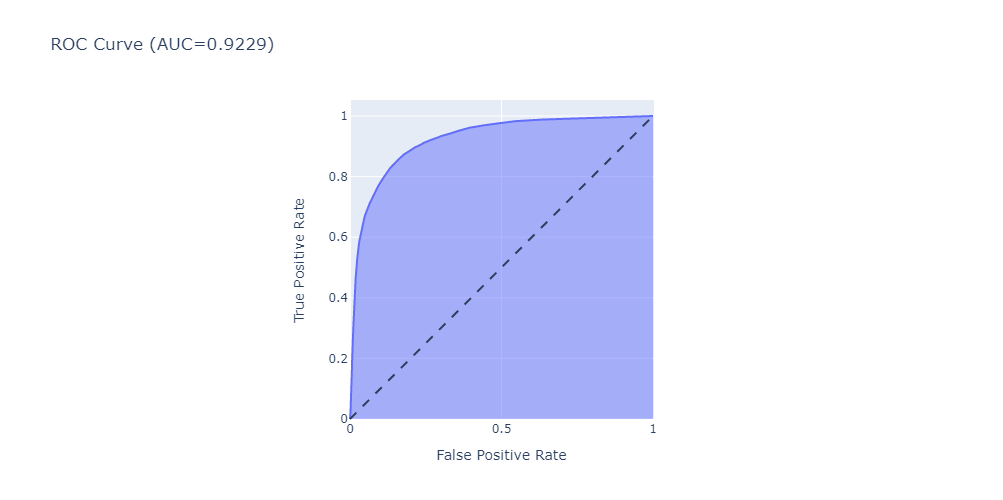

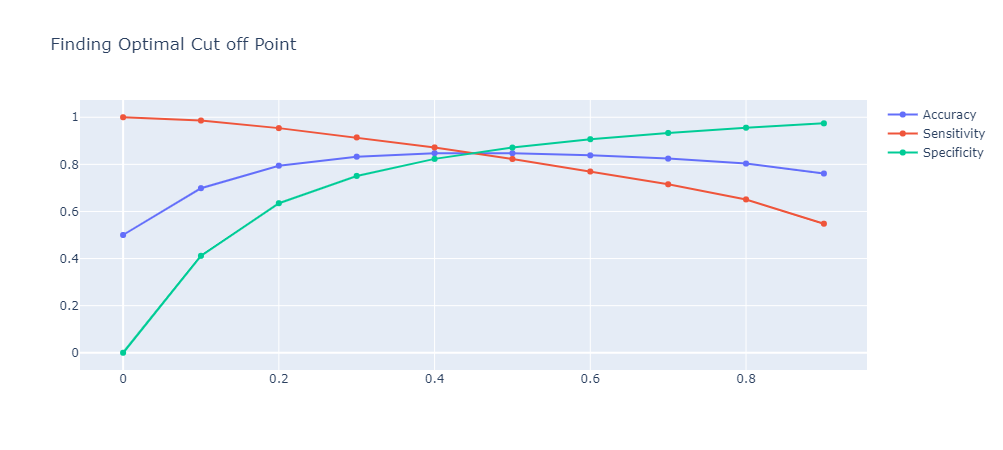

In [78]:
# plotting ROC Curve to find the trade-off

fpr, tpr, thresholds = roc_curve(y_train_smote_predfinal['True Value'], y_train_smote_predfinal.Pred_Prob)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_smote_predfinal[i]= y_train_smote_predfinal.Pred_Prob.map(lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_predfinal['True Value'], y_train_smote_predfinal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
fig= go.Figure() 
fig.add_trace(go.Scatter(x= cutoff_df['Prob'], y= cutoff_df['Accuracy'], name= 'Accuracy'))
fig.add_trace(go.Scatter(x= cutoff_df['Prob'], y= cutoff_df['Sensitivity'], name= 'Sensitivity'))
fig.add_trace(go.Scatter(x= cutoff_df['Prob'], y= cutoff_df['Specificity'], name= 'Specificity'))
fig.update_layout(title_text= 'Finding Optimal Cut off Point')
fig.show()

In [79]:
# from the optimal cut-off we can see that optimal cutoff as 0.45 
# let's drop all the col's from 0.1 - 0.9 
y_train_smote_predfinal.drop(num, axis= 1, inplace= True)

# let's predict the value using 0.45
optimal_cutoff= 0.45 
y_train_smote_predfinal['Predicted Class']= y_train_smote_predfinal.Pred_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)

y_train_smote_predfinal.head()

True Value  Pred_Prob  Predicted Class
0         0.0   0.047490                0
1         0.0   0.330237                0
2         0.0   0.144057                0
3         0.0   0.297010                0
4         0.0   0.017396                0

In [80]:
# let's check the evaluation metric report 
print('------------- Logistic Regression Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote_predfinal['True Value'], y_train_smote_predfinal['Predicted Class'])
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Logistic Regression Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     19091
         1.0       0.85      0.85      0.85     19091

    accuracy                           0.85     38182
   macro avg       0.85      0.85      0.85     38182
weighted avg       0.85      0.85      0.85     38182

----------------------------------------------------------------------------------

Accuracy: 0.848
Precision: 0.849
Recall: 0.847
f1 score: 0.848
Area Under Curve: 0.848


In [81]:
# predictions on test data 
y_test_smote_pred = res.predict(sm.add_constant(X_test[col_rfe])).values.reshape(-1)

# making data frame and predicting using above model
y_test_smote_predfinal= pd.DataFrame({'True Value': y_test, 'Pred_Prob': y_test_smote_pred})
y_test_smote_predfinal['Predicted Class']= y_test_smote_predfinal.Pred_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)
y_test_smote_predfinal.head()

True Value  Pred_Prob  Predicted Class
5365          0.0   0.070390                0
20068         0.0   0.111924                0
9260          1.0   0.233617                0
25968         0.0   0.057265                0
17360         0.0   0.328180                0

In [82]:
# let's check the evaluation metric report 
print('------------- Logistic Regression Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test_smote_predfinal['True Value'], y_test_smote_predfinal['Predicted Class'])
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Logistic Regression Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      8161
         1.0       0.32      0.83      0.46       727

    accuracy                           0.84      8888
   macro avg       0.65      0.84      0.69      8888
weighted avg       0.93      0.84      0.87      8888

----------------------------------------------------------------------------------

Accuracy: 0.843
Precision: 0.322
Recall: 0.835
f1 score: 0.465
Area Under Curve: 0.839


In [83]:
# let's store the metrics in Dataframe 

results= pd.DataFrame({'Model': ['Logistic Regression Using RFE'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results

Model  Accuracy  Precision  Recall     f1  \
0  Logistic Regression Using RFE     0.843      0.322   0.835  0.465   

   Area Under Curve  
0             0.839

<h3><font color= 'Blue'><span style="font-family:Candara">Performing Principal Component Analysis</span></font></h3> 

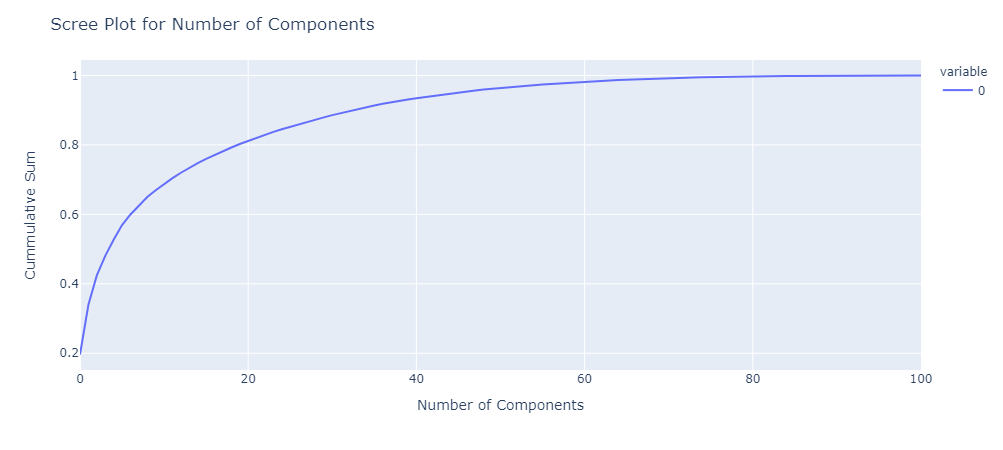

In [84]:
# let's perform PCA and extract the useful components 

pca= PCA(random_state= 0)

#fitting the X_train_smote 
pca.fit(X_train_smote)

fig= px.line(np.cumsum(pca.explained_variance_ratio_),labels=dict(index="Number of Components", value="Cummulative Sum"))
fig.update_layout(title_text= 'Scree Plot for Number of Components')
fig.show()

In [85]:
# let's perform incremental PCA with n_components = 68

comp= 68
incremental_pca = IncrementalPCA(n_components = comp)

X_train_pca = incremental_pca.fit_transform(X_train_smote)
X_test_pca = incremental_pca.transform(X_test)

X_train_pca = pd.DataFrame(data = X_train_pca)
X_test_pca = pd.DataFrame(data = X_test_pca)

In [86]:
# let's print the shapes of X_train_pca, X_test_pca

print('X_train_pca dimensions: '+ str(X_train_pca.shape))
print('X_test_pca dimensions: '+ str(X_test_pca.shape))

X_train_pca dimensions: (38182, 68)
X_test_pca dimensions: (8888, 68)


<h3><font color= 'Blue'><span style="font-family:Candara">Building Logistic Regression Model With PCA</span></font></h3> 

In [87]:
# let's build a Logistic Regression model using statsmodels

import statsmodels.api as sm
X_train_pca_sm = sm.add_constant(X_train_pca)
logm = sm.GLM(y_train_smote,X_train_pca_sm, family = sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38182
Model:                            GLM   Df Residuals:                    38113
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12785.
Date:                Mon, 01 Mar 2021   Deviance:                       25569.
Time:                        23:20:14   Pearson chi2:                 4.21e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1364      0.021      6.598      0.000       0.096       0.177
0             -0.4516      0.005    -88.944      0.000      -0.462      -0.442
1             -0.3212      0.005    -63.830      0.000      -0.331      -0.311
2             -0.2778      0.009    -31.235      0.000      -0.295      -0.260
3              0.2936      0.008     38.100      0.000       0.278       0.309
4              0.2585      0.009     28.387      0.000       0.241       0.276
5              0.0201      0.009      2.197      0.028       0.002       0.038
6             -0.1338      0.010    -13.831      0.000      -0.153      -0.115
7             -0.0744      0.010     -7.477      0.000      -0.094      -0.055
8              0.3484      0.011     31.082      0.000       0.326       0.370
9             -0.0657      0.012     -5.593      0.000      -0.089      -0.043
10             0.1603      0.013     12.013      0.000       0.134       0.186
11            -0.2478      0.014    -18.320      0.000      -0.274      -0.221
12             0.0163      0.013      1.232      0.218      -0.010       0.042
13            -0.2134      0.014    -15.606      0.000      -0.240      -0.187
14            -0.5075      0.016    -31.925      0.000      -0.539      -0.476
15             0.0787      0.015      5.239      0.000       0.049       0.108
16             0.0863      0.016      5.496      0.000       0.055       0.117
17             0.1630      0.016     10.094      0.000       0.131       0.195
18             0.0160      0.016      0.987      0.324      -0.016       0.048
19             0.2125      0.017     12.173      0.000       0.178       0.247
20            -0.1048      0.017     -6.005      0.000      -0.139      -0.071
21            -0.1365      0.018     -7.442      0.000      -0.172      -0.101
22            -0.0318      0.019     -1.654      0.098      -0.069       0.006
23             0.0270      0.018      1.522      0.128      -0.008       0.062
24             0.1111      0.019      5.785      0.000       0.073       0.149
25             0.0126      0.021      0.607      0.544      -0.028       0.053
26             0.0868      0.020      4.414      0.000       0.048       0.125
27            -0.2279      0.020    -11.382      0.000      -0.267      -0.189
28             0.0244      0.021      1.149      0.250      -0.017       0.066
29             0.3567      0.022     16.434      0.000       0.314       0.399
30             0.2180      0.022      9.980      0.000       0.175       0.261
31            -0.3012      0.022    -13.563      0.000      -0.345      -0.258
32            -0.0729      0.027     -2.703      0.007      -0.126      -0.020
33            -0.5302      0.024    -22.490      0.000      -0.576      -0.484
34             0.1018      0.024      4.238      0.000       0.055       0.149
35

In [88]:
# predictions on train data 
y_train_pca_pred = res.predict(sm.add_constant(X_train_pca_sm)).values.reshape(-1)

# making data frame 
y_train_pca_predfinal= pd.DataFrame({'True Value': y_train_smote, 'Pred_Prob': y_train_pca_pred})

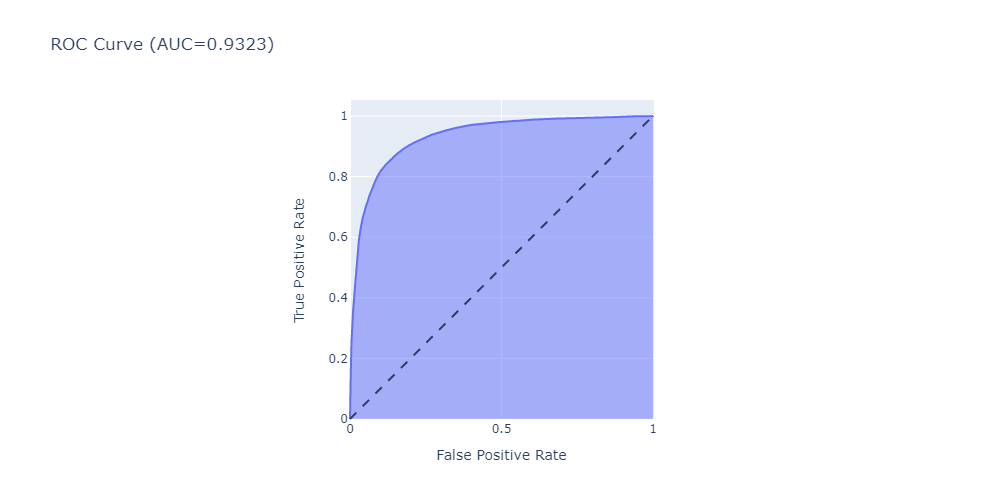

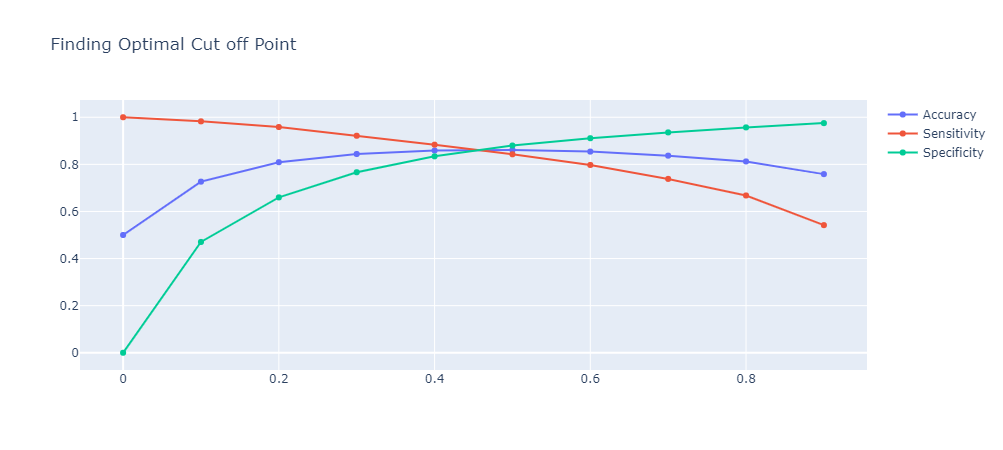

In [89]:
# plotting ROC Curve to find the trade-off

fpr, tpr, thresholds = roc_curve(y_train_pca_predfinal['True Value'], y_train_pca_predfinal.Pred_Prob)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pca_predfinal[i]= y_train_pca_predfinal.Pred_Prob.map(lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pca_predfinal['True Value'], y_train_pca_predfinal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
fig= go.Figure() 
fig.add_trace(go.Scatter(x= cutoff_df['Prob'], y= cutoff_df['Accuracy'], name= 'Accuracy'))
fig.add_trace(go.Scatter(x= cutoff_df['Prob'], y= cutoff_df['Sensitivity'], name= 'Sensitivity'))
fig.add_trace(go.Scatter(x= cutoff_df['Prob'], y= cutoff_df['Specificity'], name= 'Specificity'))
fig.update_layout(title_text= 'Finding Optimal Cut off Point')
fig.show()

In [90]:
# from the optimal cut-off we can see that optimal cutoff as 0.45 
# let's drop all the col's from 0.1 - 0.9 
y_train_pca_predfinal.drop(num, axis= 1, inplace= True)

# let's predict the value using 0.45
optimal_cutoff= 0.45 
y_train_pca_predfinal['Predicted Class']= y_train_pca_predfinal.Pred_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)

y_train_pca_predfinal.head()

True Value  Pred_Prob  Predicted Class
0         0.0   0.058543                0
1         0.0   0.436180                0
2         0.0   0.179786                0
3         0.0   0.324628                0
4         0.0   0.103434                0

In [91]:
# let's check the evaluation metric report 
print('------------- Logistic Regression with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_pca_predfinal['True Value'], y_train_pca_predfinal['Predicted Class'])
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Logistic Regression with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     19091
         1.0       0.86      0.86      0.86     19091

    accuracy                           0.86     38182
   macro avg       0.86      0.86      0.86     38182
weighted avg       0.86      0.86      0.86     38182

----------------------------------------------------------------------------------

Accuracy: 0.86
Precision: 0.858
Recall: 0.863
f1 score: 0.861
Area Under Curve: 0.86


In [92]:
# predictions on test data 
y_test_pca_pred = res.predict(sm.add_constant(X_test_pca)).values.reshape(-1)

# making data frame and predicting using above model
y_test_pca_pred= pd.DataFrame({'True Value': y_test, 'Pred_Prob': y_test_pca_pred})
y_test_pca_pred['Predicted Class']= y_test_pca_pred.Pred_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)
y_test_pca_pred.head()

True Value  Pred_Prob  Predicted Class
5365          0.0   0.062651                0
20068         0.0   0.140349                0
9260          1.0   0.337992                0
25968         0.0   0.032034                0
17360         0.0   0.250177                0

In [93]:
# let's check the evaluation metric report 
print('------------- Logistic Regression with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test_pca_pred['True Value'], y_test_pca_pred['Predicted Class'])
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Logistic Regression with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      8161
         1.0       0.33      0.83      0.47       727

    accuracy                           0.85      8888
   macro avg       0.65      0.84      0.69      8888
weighted avg       0.93      0.85      0.87      8888

----------------------------------------------------------------------------------

Accuracy: 0.846
Precision: 0.327
Recall: 0.831
f1 score: 0.469
Area Under Curve: 0.839


In [94]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['Logistic Regression Using PCA'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall     f1  \
0  Logistic Regression Using RFE     0.843      0.322   0.835  0.465   
0  Logistic Regression Using PCA     0.846      0.327   0.831  0.469   

   Area Under Curve  
0             0.839  
0             0.839

<h3><font color= 'Blue'><span style="font-family:Candara">Building Decision Tree With PCA</span></font></h3> 

In [95]:
# building decision tree by inititating object 

dt= DecisionTreeClassifier(max_features= 'log2')
dt.fit(X_train_pca, y_train_smote)

DecisionTreeClassifier(max_features='log2')

In [96]:
# predicting on train and test data 

y_train_dt_pred= dt.predict(X_train_pca)
y_test_dt_pred= dt.predict(X_test_pca)

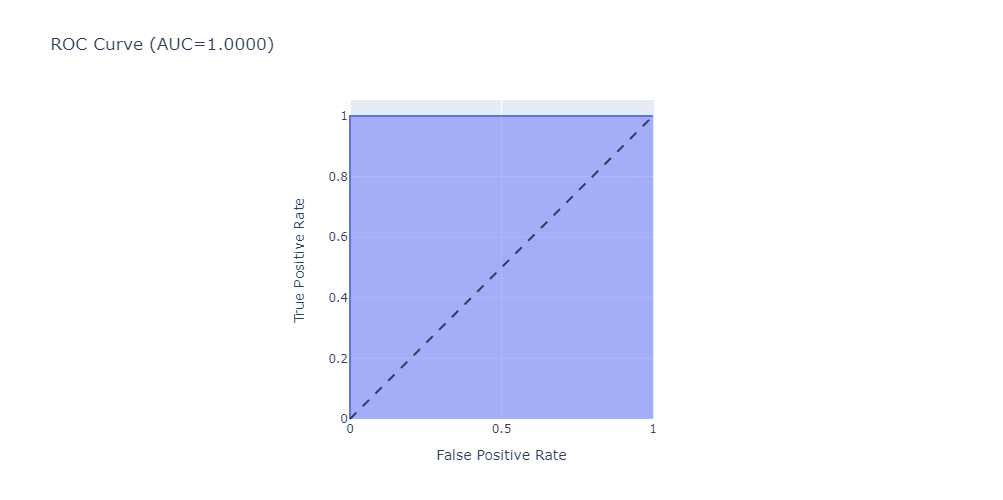

In [97]:
# plotting ROC curve 

fpr, tpr, thresholds = roc_curve(y_train_smote,y_train_dt_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [98]:
# let's check the evaluation metric report 
print('------------- Decision Trees with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote, y_train_dt_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Decision Trees with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19091
         1.0       1.00      1.00      1.00     19091

    accuracy                           1.00     38182
   macro avg       1.00      1.00      1.00     38182
weighted avg       1.00      1.00      1.00     38182

----------------------------------------------------------------------------------

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Area Under Curve: 1.0


In [99]:
# let's check the evaluation metric report 
print('------------- Decision with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test,y_test_dt_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Decision with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      8161
         1.0       0.25      0.48      0.33       727

    accuracy                           0.84      8888
   macro avg       0.60      0.67      0.62      8888
weighted avg       0.89      0.84      0.86      8888

----------------------------------------------------------------------------------

Accuracy: 0.838
Precision: 0.247
Recall: 0.477
f1 score: 0.325
Area Under Curve: 0.674


In [100]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['Decision Trees Using PCA without Tuning'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall  \
0            Logistic Regression Using RFE     0.843      0.322   0.835   
0            Logistic Regression Using PCA     0.846      0.327   0.831   
0  Decision Trees Using PCA without Tuning     0.838      0.247   0.477   

      f1  Area Under Curve  
0  0.465             0.839  
0  0.469             0.839  
0  0.325             0.674

In [101]:
# let's build a desicion tree model using Hyperparameter tuning 
dt= DecisionTreeClassifier(random_state= 0, max_features= 'log2')

# defining the parameter grid for the GridSearchCV 
params = {
    'max_depth':[10,15,20,25,30], 
    'min_samples_leaf': [50,100,150,200,250], 
    'criterion': ['gini','entropy']
}

# initiatiting GridSearchCV 
grid_search= GridSearchCV(estimator= dt, 
             param_grid= params, 
             cv= 4, 
             n_jobs= -1, verbose= 1,
             scoring= 'recall')

In [102]:
# building decision tree with best_estimator

dt= DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='log2',min_samples_leaf=50, random_state=0)
dt.fit(X_train_pca, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='log2',
                       min_samples_leaf=50, random_state=0)

In [103]:
# predicting on train and test data 

y_train_dt_pred= dt.predict(X_train_pca)
y_test_dt_pred= dt.predict(X_test_pca)

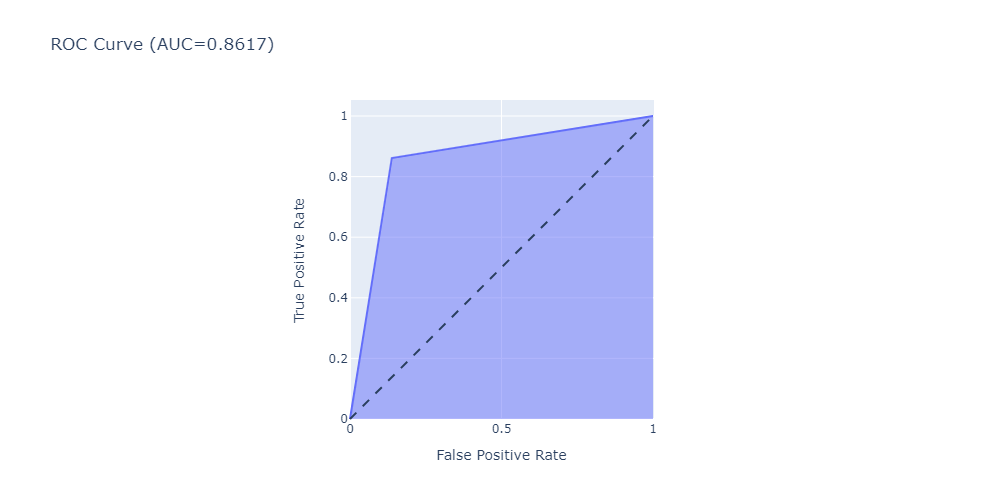

In [104]:
# plotting ROC curve 

fpr, tpr, thresholds = roc_curve(y_train_smote, y_train_dt_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [105]:
# let's check the evaluation metric report 
print('------------- Decision Trees with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote, y_train_dt_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Decision Trees with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     19091
         1.0       0.86      0.86      0.86     19091

    accuracy                           0.86     38182
   macro avg       0.86      0.86      0.86     38182
weighted avg       0.86      0.86      0.86     38182

----------------------------------------------------------------------------------

Accuracy: 0.862
Precision: 0.862
Recall: 0.861
f1 score: 0.862
Area Under Curve: 0.862


In [106]:
# let's check the evaluation metric report 
print('------------- Decision with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test, y_test_dt_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Decision with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90      8161
         1.0       0.26      0.67      0.38       727

    accuracy                           0.82      8888
   macro avg       0.62      0.75      0.64      8888
weighted avg       0.91      0.82      0.85      8888

----------------------------------------------------------------------------------

Accuracy: 0.821
Precision: 0.264
Recall: 0.67
f1 score: 0.379
Area Under Curve: 0.752


In [107]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['Decision Trees Using PCA with Tuning'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall  \
0            Logistic Regression Using RFE     0.843      0.322   0.835   
0            Logistic Regression Using PCA     0.846      0.327   0.831   
0  Decision Trees Using PCA without Tuning     0.838      0.247   0.477   
0     Decision Trees Using PCA with Tuning     0.821      0.264   0.670   

      f1  Area Under Curve  
0  0.465             0.839  
0  0.469             0.839  
0  0.325             0.674  
0  0.379             0.752

<h3><font color= 'Blue'><span style="font-family:Candara">Building Random Forests With PCA</span></font></h3> 

In [108]:
# initiating the Random Forest object 

rf = RandomForestClassifier(random_state= 0, max_features= 'log2')

# fitting the X_train_pca and y_train_smote 
rf.fit(X_train_pca, y_train_smote)

RandomForestClassifier(max_features='log2', random_state=0)

In [109]:
# predicting on train and test data 

y_train_rf_pred= rf.predict(X_train_pca)
y_test_rf_pred= rf.predict(X_test_pca)

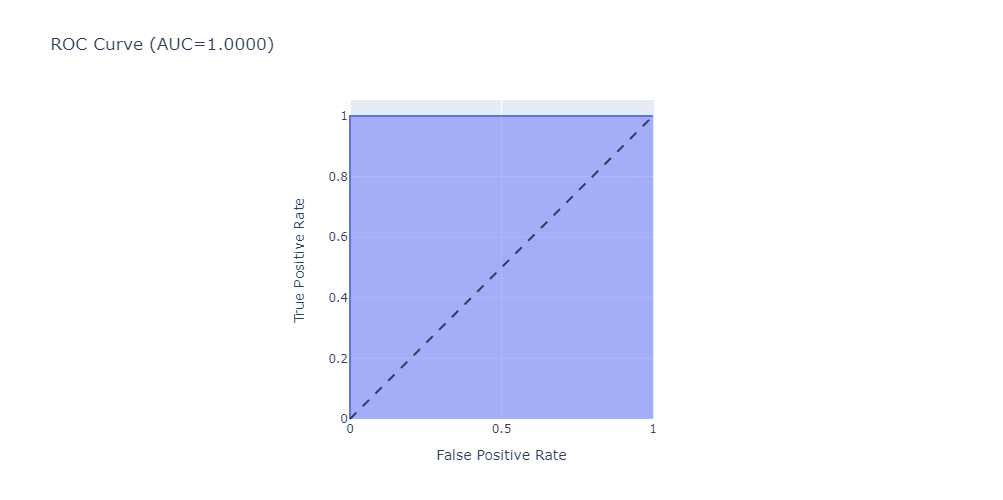

In [110]:
# plotting ROC curve 

fpr, tpr, thresholds = roc_curve(y_train_smote,y_train_rf_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [111]:
# let's check the evaluation metric report 
print('------------- Random Forests with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote, y_train_rf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Random Forests with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19091
         1.0       1.00      1.00      1.00     19091

    accuracy                           1.00     38182
   macro avg       1.00      1.00      1.00     38182
weighted avg       1.00      1.00      1.00     38182

----------------------------------------------------------------------------------

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Area Under Curve: 1.0


In [112]:
# let's check the evaluation metric report 
print('------------- Random Forests with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test, y_test_rf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Random Forests with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      8161
         1.0       0.62      0.51      0.56       727

    accuracy                           0.93      8888
   macro avg       0.79      0.74      0.76      8888
weighted avg       0.93      0.93      0.93      8888

----------------------------------------------------------------------------------

Accuracy: 0.934
Precision: 0.622
Recall: 0.506
f1 score: 0.558
Area Under Curve: 0.739


In [113]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['Random Forests Using PCA without Tuning'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall  \
0            Logistic Regression Using RFE     0.843      0.322   0.835   
0            Logistic Regression Using PCA     0.846      0.327   0.831   
0  Decision Trees Using PCA without Tuning     0.838      0.247   0.477   
0     Decision Trees Using PCA with Tuning     0.821      0.264   0.670   
0  Random Forests Using PCA without Tuning     0.934      0.622   0.506   

      f1  Area Under Curve  
0  0.465             0.839  
0  0.469             0.839  
0  0.325             0.674  
0  0.379             0.752  
0  0.558             0.739

In [114]:
# let's build a random forest using Hyperparameter tuning 
rf= RandomForestClassifier(random_state= 0, n_jobs= -1, max_features= 'log2')

# defining the parameter grid for the GridSearchCV 
params = {'n_estimators':[50, 100],
          'max_depth' : [10,20,30] , 
          'min_samples_leaf':[50,100,150],
         'min_samples_split':[100,150,200]

}

# initiatiting GridSearchCV 
grid_search= GridSearchCV(estimator= rf, 
             param_grid= params, 
             n_jobs= -1, verbose= 1,cv= 4,
             scoring= 'recall')

In [115]:
# building random forest with best_estimator

rf= RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=50,
                           min_samples_split=100, n_estimators=50, n_jobs=-1,
                           random_state=0)
rf.fit(X_train_pca, y_train_smote)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=50, n_jobs=-1,
                       random_state=0)

In [116]:
# predicting on train and test data 

y_train_rf_pred= rf.predict(X_train_pca)
y_test_rf_pred= rf.predict(X_test_pca)

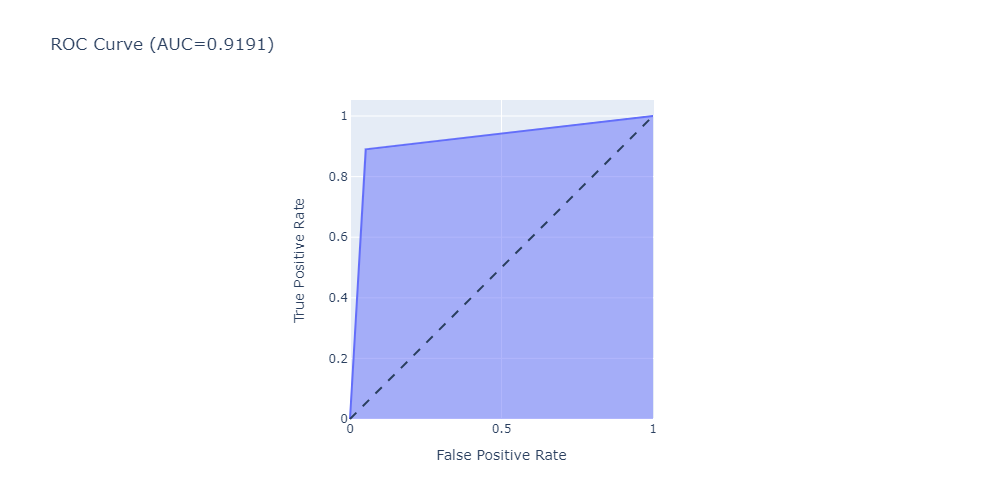

In [117]:
# plotting ROC curve 

fpr, tpr, thresholds = roc_curve(y_train_smote, y_train_rf_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [118]:
# let's check the evaluation metric report 
print('------------- Random Forest with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote, y_train_rf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Random Forest with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     19091
         1.0       0.95      0.89      0.92     19091

    accuracy                           0.92     38182
   macro avg       0.92      0.92      0.92     38182
weighted avg       0.92      0.92      0.92     38182

----------------------------------------------------------------------------------

Accuracy: 0.919
Precision: 0.945
Recall: 0.89
f1 score: 0.917
Area Under Curve: 0.919


In [119]:
# let's check the evaluation metric report 
print('------------- Random Forest with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test, y_test_rf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- Random Forest with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      8161
         1.0       0.48      0.69      0.57       727

    accuracy                           0.91      8888
   macro avg       0.73      0.81      0.76      8888
weighted avg       0.93      0.91      0.92      8888

----------------------------------------------------------------------------------

Accuracy: 0.913
Precision: 0.48
Recall: 0.695
f1 score: 0.568
Area Under Curve: 0.814


In [120]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['Random Forest Using PCA with Tuning'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall  \
0            Logistic Regression Using RFE     0.843      0.322   0.835   
0            Logistic Regression Using PCA     0.846      0.327   0.831   
0  Decision Trees Using PCA without Tuning     0.838      0.247   0.477   
0     Decision Trees Using PCA with Tuning     0.821      0.264   0.670   
0  Random Forests Using PCA without Tuning     0.934      0.622   0.506   
0      Random Forest Using PCA with Tuning     0.913      0.480   0.695   

      f1  Area Under Curve  
0  0.465             0.839  
0  0.469             0.839  
0  0.325             0.674  
0  0.379             0.752  
0  0.558             0.739  
0  0.568             0.814

<h3><font color= 'Blue'><span style="font-family:Candara">Building XGBoost Model With PCA</span></font></h3> 

In [121]:
# initiating the XG Boost Classifier

xgclf = xgb.XGBClassifier()

# fitting the X_train_pca and y_train_smote 
xgclf.fit(X_train_pca, y_train_smote)

[23:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
# predicting on train and test data 

y_train_xgclf_pred= xgclf.predict(X_train_pca)
y_test_xgclf_pred= xgclf.predict(X_test_pca)

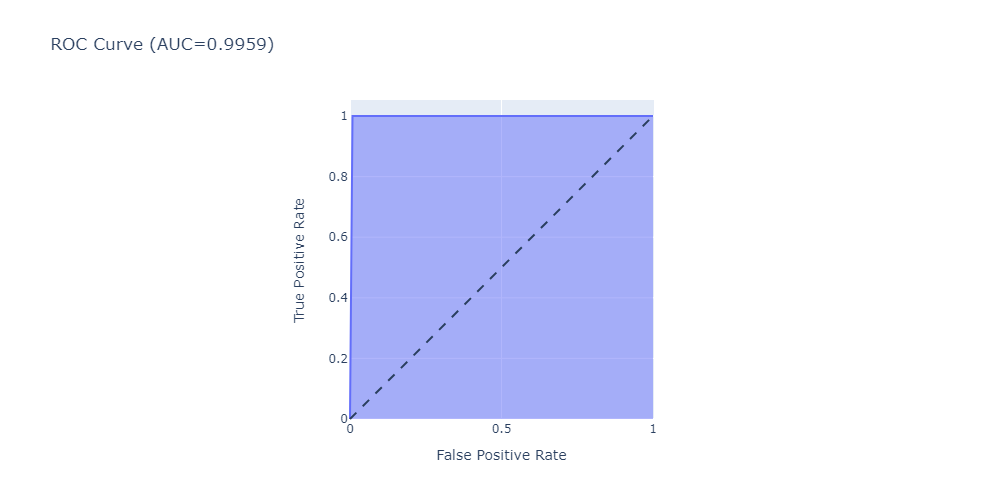

In [123]:
# plotting ROC curve 

fpr, tpr, thresholds = roc_curve(y_train_smote,y_train_xgclf_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [124]:
# let's check the evaluation metric report 
print('------------- XG Boost Classifier with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote, y_train_xgclf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- XG Boost Classifier with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     19091
         1.0       0.99      1.00      1.00     19091

    accuracy                           1.00     38182
   macro avg       1.00      1.00      1.00     38182
weighted avg       1.00      1.00      1.00     38182

----------------------------------------------------------------------------------

Accuracy: 0.996
Precision: 0.992
Recall: 1.0
f1 score: 0.996
Area Under Curve: 0.996


In [125]:
# let's check the evaluation metric report 
print('------------- XG Boost Classifier with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test, y_test_xgclf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- XG Boost Classifier with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      8161
         1.0       0.51      0.60      0.55       727

    accuracy                           0.92      8888
   macro avg       0.73      0.77      0.75      8888
weighted avg       0.93      0.92      0.92      8888

----------------------------------------------------------------------------------

Accuracy: 0.919
Precision: 0.505
Recall: 0.6
f1 score: 0.548
Area Under Curve: 0.774


In [126]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['XG Boost Classifier Using PCA without Tuning'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall  \
0                 Logistic Regression Using RFE     0.843      0.322   0.835   
0                 Logistic Regression Using PCA     0.846      0.327   0.831   
0       Decision Trees Using PCA without Tuning     0.838      0.247   0.477   
0          Decision Trees Using PCA with Tuning     0.821      0.264   0.670   
0       Random Forests Using PCA without Tuning     0.934      0.622   0.506   
0           Random Forest Using PCA with Tuning     0.913      0.480   0.695   
0  XG Boost Classifier Using PCA without Tuning     0.919      0.505   0.600   

      f1  Area Under Curve  
0  0.465             0.839  
0  0.469             0.839  
0  0.325             0.674  
0  0.379             0.752  
0  0.558             0.739  
0  0.568             0.814  
0  0.548             0.774

In [127]:
# let's build a XG Boost Classifier using Hyperparameter tuning 
xgclf = xgb.XGBClassifier()

# defining the parameter grid for the GridSearchCV 
params = {'learning_rate': [0.3, 0.5],
          'max_depth': [6],
          'min_child_weight': [1],
          'n_estimators': [50, 100]
}

# initiatiting GridSearchCV 
grid_search= GridSearchCV(estimator= xgclf, 
             param_grid= params, 
             n_jobs= -1, verbose= 1,cv= 4,
             scoring= 'recall')

In [128]:
# building random forest with best_estimator

xgclf= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                     importance_type='gain', interaction_constraints='',
                     learning_rate=0.5, max_delta_step=0, max_depth=6,
                     min_child_weight=1, missing=np.nan, monotone_constraints='()',
                     n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
                     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                     tree_method='exact', validate_parameters=1, verbosity=None)
xgclf.fit(X_train_pca, y_train_smote)

[23:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
# predicting on train and test data 

y_train_xgclf_pred= xgclf.predict(X_train_pca)
y_test_xgclf_pred= xgclf.predict(X_test_pca)

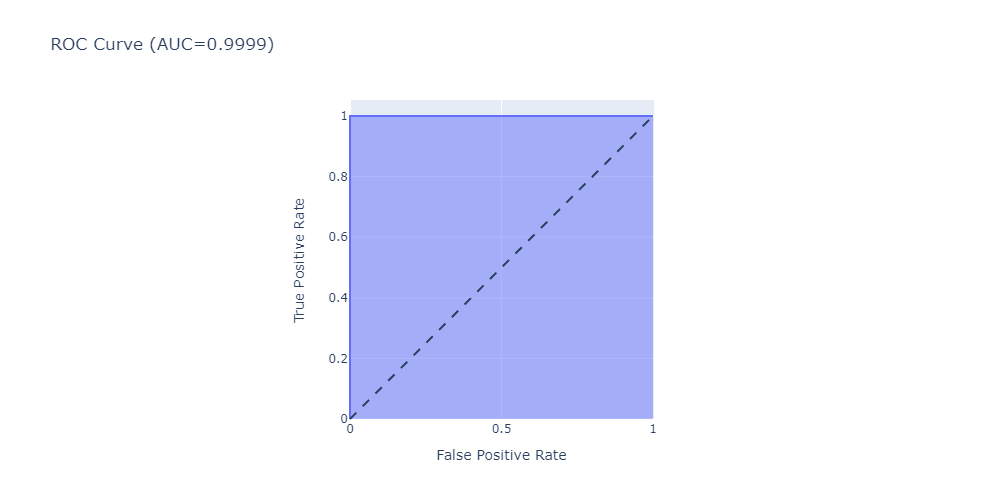

In [130]:
# plotting ROC curve 

fpr, tpr, thresholds = roc_curve(y_train_smote, y_train_xgclf_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [131]:
# let's check the evaluation metric report 
print('------------- XG Boost Classifier with PCA Evaluation Report on Train Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_train_smote, y_train_xgclf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- XG Boost Classifier with PCA Evaluation Report on Train Data ----------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19091
         1.0       1.00      1.00      1.00     19091

    accuracy                           1.00     38182
   macro avg       1.00      1.00      1.00     38182
weighted avg       1.00      1.00      1.00     38182

----------------------------------------------------------------------------------

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Area Under Curve: 1.0


In [132]:
# let's check the evaluation metric report 
print('------------- XG Boost Classifier with PCA Evaluation Report on Test Data ----------------', end= '\n\n')
a,p,r,f,ar= metric_evaluation(y_test, y_test_xgclf_pred)
print('----------------------------------------------------------------------------------', end= '\n\n')
print('Accuracy: '+ str(a), end= '\n')
print('Precision: '+ str(p), end= '\n')
print('Recall: '+ str(r), end= '\n')
print('f1 score: '+ str(f), end= '\n')
print('Area Under Curve: '+str(ar))

------------- XG Boost Classifier with PCA Evaluation Report on Test Data ----------------

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      8161
         1.0       0.52      0.57      0.55       727

    accuracy                           0.92      8888
   macro avg       0.74      0.76      0.75      8888
weighted avg       0.93      0.92      0.92      8888

----------------------------------------------------------------------------------

Accuracy: 0.922
Precision: 0.521
Recall: 0.572
f1 score: 0.546
Area Under Curve: 0.763


In [133]:
# let's store the metrics in Dataframe 

temp= pd.DataFrame({'Model': ['XG Boost Classifier Using PCA with Tuning'], 
                       'Accuracy': [a], 
                       'Precision': [p], 
                       'Recall': [r], 
                       'f1': [f], 
                       'Area Under Curve': [ar]})

results= pd.concat([results, temp], axis= 0)
results

Model  Accuracy  Precision  Recall  \
0                 Logistic Regression Using RFE     0.843      0.322   0.835   
0                 Logistic Regression Using PCA     0.846      0.327   0.831   
0       Decision Trees Using PCA without Tuning     0.838      0.247   0.477   
0          Decision Trees Using PCA with Tuning     0.821      0.264   0.670   
0       Random Forests Using PCA without Tuning     0.934      0.622   0.506   
0           Random Forest Using PCA with Tuning     0.913      0.480   0.695   
0  XG Boost Classifier Using PCA without Tuning     0.919      0.505   0.600   
0     XG Boost Classifier Using PCA with Tuning     0.922      0.521   0.572   

      f1  Area Under Curve  
0  0.465             0.839  
0  0.469             0.839  
0  0.325             0.674  
0  0.379             0.752  
0  0.558             0.739  
0  0.568             0.814  
0  0.548             0.774  
0  0.546             0.763

#### Important features

In [134]:
# plotting the importance of each column in with the 3 Prinicple Components 
col = list(X_train_smote.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

PC1       PC2       PC3           Feature
0   0.268605  0.050898  0.350588            arpu_8
1   0.133734 -0.095671 -0.003260       onnet_mou_8
2   0.163893 -0.070160 -0.049784      offnet_mou_8
3  -0.023798 -0.081308  0.192132     roam_ic_mou_8
4  -0.020072 -0.097546  0.214923     roam_og_mou_8
5   0.161011 -0.004836 -0.147356  loc_og_t2t_mou_8
6   0.183471  0.009525 -0.179325  loc_og_t2m_mou_8
7   0.109021  0.032725 -0.034110  loc_og_t2f_mou_8
8   0.044152  0.005249  0.049745  loc_og_t2c_mou_8
9   0.192247  0.008499 -0.184838      loc_og_mou_8
10  0.097440 -0.105446  0.107366  std_og_t2t_mou_8
11  0.106651 -0.105770  0.040238  std_og_t2m_mou_8
12  0.052865  0.008076 -0.010633  std_og_t2f_mou_8
13  0.110691 -0.117240  0.041396      std_og_mou_8
14  0.032067  0.012400  0.014005      isd_og_mou_8

<h2><font color= 'Blue'><span style="font-family:Candara">7. Business Recommendations</span></font></h2> 

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.
-  Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.
- Average revenue per user seems to be most important feature in determining churn prediction.

-  Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour
-   Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

-   Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.




<h2><font color= 'Blue'><span style="font-family:Candara">8. Model Insights </span></font></h2>  

-  Logistic Regression Using RFE and Logistic Regression Using RFE produce best result on this dataset 0.83 AUC.

-  Random forest produce best accuracy with 0.93 (default overfit model) and 0.91 with tuned hyperparameters.

- XGBoost also produce apt accurac of 0.919 (default overfit model) and 0.922 with tuned hyperparameters.

#### As per our analysis Logistic Regression provide best AUC and Random forest produce best accuracy and models can be selected to predict churn data for future dataset or production.